# Assignment 3 - Data Integration and Reshaping
------------
#### Student Name: Kshitij Patil
#### Student ID: 29519136
#### Date: 12/06/2019
 -------------

## Table of Contents

**Introduction** <br>
**Part 1 - Data Integration**
  1. Genral <br>
    1.1 Importing Libraries <br>
    1.2 Reading Poperty Data <br>
    1.3 Reading Crime Data <br>
  2. Finding Suburbs <br>
  3. Crime Data <br>
    3.1 Reading Council Data <br>
    3.2 Joining the Data <br>
    3.3 Crime Caluation <br>
  4. Train based data <br>
    4.1 Reading and Integrating the data <br>
    4.2 Filtering of Data based on condition <br>
    4.3 Removing the Distance and Station ID <br>
    4.4 Removing the average Time
    
**Part 2 - Data Reshaping**  

**Conclusion**

----------

## PART 1 - Data Integration

#### TASKS:
* Reading from various sources in various schema and format.
* Condensing it into smaller dataset by cleaning and segregating.
* Making a new schema and writing to it.

### 1. Genral

**1.1 IMPORTING THE REQURIRED LIBRARIES**

In [563]:
import pandas as pd
import numpy as np
from datetime import datetime
import shapefile
import matplotlib.pyplot as plt
from shapely.geometry import shape, Point, Polygon
from shapely.geometry import shape # Why it does not work with one import?
import re 
import os
from zipfile import ZipFile as zp
%matplotlib inline


**READING THE FIlES**

**1.2 Reading Property CSV**

* Reading this csv was straight forward

In [564]:
property_data = pd.read_csv('29519136.csv',index_col='ID')
property_data.head()



,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude
ID,,,,,,,,,,,
ID194928825,7/43 Argyle St,2,u,700000.0,24/06/2017,1.0,1.0,470.0,12.0,-37.79723,144.97686
ID489125343,3 Ringtail Cct,3,h,725500.0,22/08/2016,2.0,2.0,214.0,5.0,-37.78310,144.88250
ID773330210,393A Brunswick Rd,3,h,1260000.0,18/03/2017,1.0,6.0,563.0,59.0,-37.77570,144.95050
ID671319693,38/568 New St,2,u,520000.0,13/05/2017,1.0,1.0,1647.0,15.0,-37.88470,144.99720
ID898074974,2 Kerang Av,3,h,760000.0,8/07/2017,1.0,1.0,606.0,69.0,-37.72057,145.02615


In [565]:
property_data['Date'] = pd.to_datetime(property_data['Date'],format='%d/%m/%Y')


**1.3 Reading the Crime data**

* The Crime Data is in xlxs file
* We also need to take into consideration the sheet number
* Let's Observe how the data looks

In [566]:
crime_rate = pd.read_excel('crimebylocationdatatable-yearending31march2016.xlsx',sheet_name='Table 1')
crime_rate


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,Table 1. Number of offences by geographic area...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<br>

* There are some columns that are NA we need to clean that the best way of doing so would be dropping those   columns altogether but in the columns with 'All na' first and the rows** 

<br>

In [567]:
crime_rate.drop(['Unnamed: 0'],axis=1,inplace=True)
crime_rate.dropna(inplace=True)
new_columns = crime_rate.iloc[0]
crime_rate = crime_rate[1:]
crime_rate.columns = new_columns
crime_rate.head()


17,Apr - Mar reference period,Police Region,Police Service Area,Local Government Area,CSA Offence Division,CSA Offence Subdivision,Offence Count,LGA ERP,Victorian ERP
18,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A10 Homicide and related offences,4,123600,5632521
19,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A20 Assault and related offences,568,123600,5632521
20,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A30 Sexual offences,132,123600,5632521
21,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A40 Abduction and related offences,12,123600,5632521
22,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A50 Robbery,46,123600,5632521


### 2. Finding Suburbs

**Reading the shp file of Shape file**

* Shape file has a unique challenge associated with it.
* We need to read the shp file which we will do using shapely.
* We need to asses weather a point lies within a shape file.
    * Either by creating a shape and calulating the point.
    * Or using inbuilt function. (We have used this method)
* Then Finally assign that value as the **Suburb**.



In [568]:
sf = shapefile.Reader('vic_suburb_boundary/VIC_LOCALITY_POLYGON_shp.shp')


**Checking weather a point lies within a shape file**

In [569]:
#IMPROVED IMPLEMENTATION
number_shapes = range(len(sf.shapes()))
shapes_ = sf.shapes()
suburb = []
for x,y in property_data[['Longtitude','Lattitude']].values:
    z = (x,y)
    for num,single_shape in enumerate(shapes_):
        if Point(z).within(shape(single_shape)):
            suburb.append(sf.records()[num][6])
            break #This makes the timecomplexity less from O(n2) to O(n summation 1 to n)
            

In [570]:
property_data['Suburb'] = suburb


In [571]:
crime_rate.reset_index()
#


17,index,Apr - Mar reference period,Police Region,Police Service Area,Local Government Area,CSA Offence Division,CSA Offence Subdivision,Offence Count,LGA ERP,Victorian ERP
0,18,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A10 Homicide and related offences,4,123600,5632521
1,19,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A20 Assault and related offences,568,123600,5632521
2,20,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A30 Sexual offences,132,123600,5632521
3,21,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A40 Abduction and related offences,12,123600,5632521
4,22,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A50 Robbery,46,123600,5632521
5,23,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A60 Blackmail and extortion,2,123600,5632521
6,24,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,"A70 Stalking, harassment and threatening behav...",148,123600,5632521
7,25,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A80 Dangerous and negligent acts endangering p...,75,123600,5632521
8,26,2012,1 North West Metro,BANYULE,BANYULE,B Property and deception offences,B10 Arson,53,123600,5632521
9,27,2012,1 North West Metro,BANYULE,BANYULE,B Property and deception offences,B20 Property damage,938,123600,5632521


In [572]:
crime_rate.head()


17,Apr - Mar reference period,Police Region,Police Service Area,Local Government Area,CSA Offence Division,CSA Offence Subdivision,Offence Count,LGA ERP,Victorian ERP
18,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A10 Homicide and related offences,4,123600,5632521
19,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A20 Assault and related offences,568,123600,5632521
20,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A30 Sexual offences,132,123600,5632521
21,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A40 Abduction and related offences,12,123600,5632521
22,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A50 Robbery,46,123600,5632521


### 3. CRIME RATE
**3.1 Reading Council Data**

* The Council Data is a text file which looks like string value inputed in the format of a dictionary
* We need to read this data and resolve the data in lists or dictionary.
    * We could use eval()
    * regex (we will use this)
    * or splitting accross values.
* We will read the data line by line to get all the and then sort it across the regex.

In [573]:
# Read the Council Data
with open('councils.txt','r') as f:
    council_txt = f.read()
council_txt = council_txt.split('\n') 

# Take all the values with words and spaces
reg = r'[\w+ ]+\w+'

# Making a Dictinary from Strings
council_dict = {}
for single_council in council_txt[:len(council_txt) - 1]:
    x,y = single_council.split(':')
    council_dict[x.strip()] = [x.upper() for x in re.findall(reg,y.strip())]
    
    

In [574]:
#This is the Dictionary that gets created.
council_dict


{'BANYULE': ['ABBOTSFORD', 'AIRPORT WEST', 'ALBERT PARK', 'ALPHINGTON'],
 'BRIMBANK': ['ALTONA', 'ALTONA NORTH', 'ARMADALE', 'ASCOT VALE'],
 'DAREBIN': ['ASHBURTON', 'ASHWOOD', 'AVONDALE HEIGHTS', 'BALACLAVA'],
 'HOBSONS BAY': ['BALWYN', 'BALWYN NORTH', 'BENTLEIGH', 'BENTLEIGH EAST'],
 'HUME': ['BOX HILL', 'BRAYBROOK', 'BRIGHTON', 'BRIGHTON EAST'],
 'MARIBYRNONG': ['BRUNSWICK', 'BRUNSWICK WEST', 'BULLEEN', 'BURWOOD'],
 'MELBOURNE': ['CAMBERWELL', 'CANTERBURY', 'CARLTON NORTH', 'CARNEGIE'],
 'MELTON': ['CAULFIELD', 'CAULFIELD NORTH', 'CAULFIELD SOUTH', 'CHADSTONE'],
 'MOONEE VALLEY': ['CLIFTON HILL', 'COBURG', 'COBURG NORTH', 'COLLINGWOOD'],
 'MORELAND': ['DONCASTER', 'EAGLEMONT', 'ELSTERNWICK', 'ELWOOD'],
 'NILLUMBIK': ['ESSENDON', 'ESSENDON NORTH', 'FAIRFIELD', 'FITZROY'],
 'WHITTLESEA': ['FITZROY NORTH', 'FLEMINGTON', 'FOOTSCRAY', 'GLEN IRIS'],
 'WYNDHAM': ['GLENROY', 'GOWANBRAE', 'HADFIELD', 'HAMPTON'],
 'YARRA': ['HAMPTON EAST',
  'HAWTHORN',
  'HEIDELBERG HEIGHTS',
  'HEIDELBERG W

#### 3.2 Joining the Data

* Every Subrub has a local government looking after it we need to find for our data what government it property data suburb correseponds to so that we can assign it its government
* This is primarly done because we belive that a crime **"reported"** in a paticular area is dependent in that area's government.
* Multiple Suburbs can have one government (Not the other way round).
* Finally after getting the government of that area we can find the crime reproted to that goverment.

In [575]:
# Now arranging accoring to suburub
len(property_data)

loc_gov= []
not_in_list = []

for x in property_data['Suburb']:
    for key,value in council_dict.items():
        if x in value:
            loc_gov.append(key)
            break #This makes the timecomplexity less from O(n2) to O(n summation 1 to n)

#Assigning it a to a new_column            
property_data['Gov'] = loc_gov 
print(f'This is the number of matches: {len(loc_gov)}')


This is the number of matches: 720


* Let's see how are GOV fits in the data

In [576]:
property_data.head()


,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,Gov
ID,,,,,,,,,,,,,
ID194928825,7/43 Argyle St,2,u,700000.0,2017-06-24,1.0,1.0,470.0,12.0,-37.79723,144.97686,FITZROY,NILLUMBIK
ID489125343,3 Ringtail Cct,3,h,725500.0,2016-08-22,2.0,2.0,214.0,5.0,-37.78310,144.88250,MAIDSTONE,BAW BAW
ID773330210,393A Brunswick Rd,3,h,1260000.0,2017-03-18,1.0,6.0,563.0,59.0,-37.77570,144.95050,BRUNSWICK,MARIBYRNONG
ID671319693,38/568 New St,2,u,520000.0,2017-05-13,1.0,1.0,1647.0,15.0,-37.88470,144.99720,BRIGHTON,HUME
ID898074974,2 Kerang Av,3,h,760000.0,2017-07-08,1.0,1.0,606.0,69.0,-37.72057,145.02615,RESERVOIR,EAST GIPPSLAND


**Calculating the Price Of An Area**
* Before we complete the crime lets just quickly identify all our overpriced property
* The values that decide the price is given

In [577]:
# Grouping the price according to the required price.
property_data['Median Amount']=property_data.groupby(['Suburb','Rooms','Type','Bathroom','Car'])['Price'].transform('median')
new_list = []

#Putting all the values in a list
for x,y in property_data[['Price','Median Amount']].values:
    if x<y:
        new_list.append(1)
    else:
        new_list.append(0)

# assiging the value to the the new column in the dataframe
property_data['over_priced?'] = new_list        

In [612]:
print(f'The number of over priced property {len(property_data[property_data["over_priced?"] == 1])}')
print(f'NOTE- There might be duplicated properties which we will be removed automatically later')


The number of over priced property 75
NOTE- There might be duplicated properties which we will be removed automatically later


**Creating a function for crime**
* The crime needs to be calculated accross three types A, B and C
* We will create a function to deal with it appropriately

In [578]:
'''
A function that calcuates the crime by the type
where,
    crime_type -> A or B or C -> type string
    returns -> mean of crime for that area -> type list
'''
def crimeby_area(crime_type):
    list_mean = []
    for x,y in property_data[['Date','Gov']].values:
        year = x.year
        crime_area = crime_rate[(crime_rate['Local Government Area'] == y) & (crime_rate['CSA Offence Division'].str.startswith(crime_type))]
        crime_area_mean = crime_area[(crime_area['Apr - Mar reference period']<year) & (crime_area['Apr - Mar reference period']>year-3)]['Offence Count'].mean()
        list_mean.append(crime_area_mean)
    return list_mean

In [579]:
property_data['crime_A_average'] = crimeby_area('A')
property_data['crime_B_average'] = crimeby_area('B')
property_data['crime_C_average'] = crimeby_area('C')

property_data.head()

,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,Gov,Median Amount,over_priced?,crime_A_average,crime_B_average,crime_C_average
ID,,,,,,,,,,,,,,,,,,
ID194928825,7/43 Argyle St,2,u,700000.0,2017-06-24,1.0,1.0,470.0,12.0,-37.79723,144.97686,FITZROY,NILLUMBIK,700000.0,0,46.133333,397.900000,30.000000
ID489125343,3 Ringtail Cct,3,h,725500.0,2016-08-22,2.0,2.0,214.0,5.0,-37.78310,144.88250,MAIDSTONE,BAW BAW,725500.0,0,95.000000,364.600000,85.000000
ID773330210,393A Brunswick Rd,3,h,1260000.0,2017-03-18,1.0,6.0,563.0,59.0,-37.77570,144.95050,BRUNSWICK,MARIBYRNONG,1260000.0,0,112.000000,1164.500000,190.833333
ID671319693,38/568 New St,2,u,520000.0,2017-05-13,1.0,1.0,1647.0,15.0,-37.88470,144.99720,BRIGHTON,HUME,700000.0,1,376.187500,2144.454545,367.333333
ID898074974,2 Kerang Av,3,h,760000.0,2017-07-08,1.0,1.0,606.0,69.0,-37.72057,145.02615,RESERVOIR,EAST GIPPSLAND,760000.0,0,119.266667,376.700000,74.142857


### 4. Time Based Data

#### 4.1 Reading and Integrating Data

* The Data is accross multiple files in Zip format.
* Each format in closer inspection gives us another detail. That there are multiple texts.
* These texts are in ordered manner like calender,trips... etc
* We will deal with it later
* We are going to find all paths read the data store merge similar data and store it in a lists
* Which we will later on assign to individual variables

In [582]:
#EXTRACTING AND READING THE FILES:-
base_path = 'gtfs'
list_files = os.listdir(base_path)
list_files = list_files[1:len(list_files)]
gtfs_data = pd.DataFrame()

with zp('gtfs/1/google_transit.zip') as f:
   name_list = f.namelist()

gtfs_list = []

for _ in name_list:
    gtfs_list.append(pd.DataFrame())

for x in list_files:
    for subdir in os.listdir(base_path+'/'+x):
        if subdir.endswith('.zip'): 
            with zp(base_path+'/'+x+'/'+subdir) as f:
                f.extractall()
            for x,y,num in zip(name_list,gtfs_list,range(len(name_list))):
                gtfs_list[num] = pd.concat([y,pd.read_csv(x)],ignore_index=True)

In [583]:
agency = gtfs_list[0]
routes = gtfs_list[1]
trips = gtfs_list[2]
stops = gtfs_list[3]
calender = gtfs_list[4]
calender_dates = gtfs_list[5]
shapes = gtfs_list[6]
stop_times = gtfs_list[7]


In [584]:
stop_times.tail()


,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
4467590,6127.T0.5-V41-K-mjp-1.11.R,22:45:00,22:45:00,17572,6,NaN,0,0,55640.020824
4467591,6127.T0.5-V41-K-mjp-1.11.R,22:50:00,22:50:00,17571,7,NaN,0,0,62980.874311
4467592,6127.T0.5-V41-K-mjp-1.11.R,22:57:00,22:57:00,17569,8,NaN,0,0,70919.359338
4467593,6127.T0.5-V41-K-mjp-1.11.R,23:11:00,23:11:00,41301,9,NaN,0,0,78422.814975
4467594,6127.T0.5-V41-K-mjp-1.11.R,23:18:00,23:18:00,17566,10,NaN,0,0,108555.452314


### 4.2 Filtering of Data based on condition

**Understanding GTFS Data**
The GTFS file is multiple datasets with common keys accross all files 
To inderstand the Data we need to understand what all data is there available in the Data.
<img src="gtfs.png">

**Refrence : https://en.wikipedia.org/wiki/General_Transit_Feed_Specification**

* Our Motto in this is to find:-
    * All the trains stations closest to us that has a direct to CBD an all workdays from 7:00 to 9:30
    * The second is to find all stations closest to a house
    * Finally we Want to find out all the average time it will take a person from house to CBD using public transport
* We will first combine all the days and remove the service ID.
* Then we will take only those stops that have a direct to CBD and combine it with calender.
* After that we will calculate the data for the timings.
* Finally we will combine everything and remove the stop ID's.

In [585]:
#TRIPS THAT ARE IN THE WEEKEDAY
sub_calender = calender[(calender['monday']==1)&(calender['tuesday']==1)&(calender['wednesday']==1)&(calender['thursday']==1)&(calender['friday']==1)]
#FINDING THOSE TRIPS
sub_trips=trips[trips['service_id'].isin(sub_calender['service_id'].tolist())]
#GETTING THE TRIPS THAT GO TO SOUTHERN CROSS DIRECTLY 
southern_stops_time = stop_times[(stop_times['stop_id'] == 20043)|(stop_times['stop_id'] == 22180)]
#GETTING THOSE VALUES OF TRIP FROM SUB TRIP THAT GO TO SOUTHERN CROSS
southern_trips_time = sub_trips[sub_trips['trip_id'].isin(southern_stops_time['trip_id'])]['trip_id']#need to remove ['trip_id']

#Check time codeblock
southern_df_trip  = sub_trips[sub_trips['trip_id'].isin(southern_stops_time['trip_id'])]

#GETTING THE VALUES FOR SPECIFIC TIME

'''
This is a shortcut 
NOTE: I did this shortcut because there is some discrepancy in time that i would need to correct like midnight is
      is given as 24 which is not conisdered by datetime object
'''
time_1 = 70000
time_2 = 93000

#Using the shortcut method - Make everyting into string data
stop_times['new_time'] = stop_times['departure_time'].apply(lambda x: int(x.replace(':','')))

#Checking according to the time
new_times = stop_times[(stop_times['new_time']<=time_2)& (stop_times['new_time']>=time_1)]

#need to differ from this part
stop_id  = new_times[new_times['trip_id'].isin(southern_trips_time)]['stop_id'].values
all_stop_id = set(stop_id)

#New "Stop_times" according to the trips that a house can take.
new_times_times = new_times[new_times['trip_id'].isin(southern_trips_time)]

In [586]:
z= new_times_times[(new_times_times['stop_id']!=22180)&(new_times_times['stop_id']!=20043)]['trip_id'].values
len(set(new_times_times['stop_id']))
sub_time = new_times_times[new_times_times['trip_id'].isin(z)]
new_sub_trip_=new_times_times[(new_times_times['stop_id']==22180)|(new_times_times['stop_id']==20043)]['trip_id']
new_sub_trip_time=new_times_times[new_times_times['trip_id'].isin(new_sub_trip_)]


### 4.3 Removing Distance and Station ID

* The Data that we have is the ID's that are all have trips **sharing** with CBD station
* These data does **NOT** tell weather the trip is *TO* or *FROM* the CBD.We are intrested in the from.
* We will do this by checking the departure of our individual stations to that of their arrival in CBD
* If the differnce in the arrival to the departure can is neagtive it is indicative of the fact it coming from CBD
* Remove Such Values

In [587]:
#THIS IS A CHECK

intermediary_time = new_times[new_times['trip_id'].isin(southern_trips_time)]
listings =[]
cnt=0
for x in all_stop_id:
    cnt += 1
    listings_inner =[]
    trip_stop_dep = new_sub_trip_time[new_sub_trip_time['stop_id']==x][['trip_id','stop_id','departure_time']].values
    for single_value in trip_stop_dep:
            temp_tab=new_sub_trip_time[new_sub_trip_time['trip_id']==single_value[0]] 
            arr_time=temp_tab[(temp_tab['stop_id']==22180) |(temp_tab['stop_id']==20043)]['arrival_time'].values[0]
            diff = datetime.strptime(arr_time,"%H:%M:%S") - datetime.strptime(single_value[2],"%H:%M:%S")
            listings_inner.append(diff.total_seconds())
    bool_val = True
    for x in listings_inner:
        if x > 0:
            bool_val = False
    if bool_val:
        listings.append(single_value[1])

* The Train station that do not have values that are going to CBD are 

In [588]:
print(f'The number of stations that has trains that are only coming from CBD {len(listings)}')

The number of stations that has trains that are only coming from CBD 49


In [589]:
#Segregating the values according to 
sub_stops = stops[stops['stop_id'].isin(stop_id)].drop_duplicates()
sub_stops = sub_stops[~sub_stops['stop_id'].isin(listings)]
len(set(sub_stops['stop_id']))
sub_stops.head()

#Will fasten the for loop in CODE BLOCK 2
list_stop_id = stop_times[stop_times['stop_id'].isin(sub_stops['stop_id'].tolist())]
len(set(list_stop_id['trip_id']))
new_timings_new = stop_times[stop_times['trip_id'].isin(list_stop_id['trip_id'])]
new_timings_new
new_timings_new = new_timings_new[(new_timings_new['stop_id']==22180)|(new_timings_new['stop_id']==20043)]

In [591]:
sub_stops.head()

,stop_id,stop_name,stop_lat,stop_lon
319,20326,Malmsbury Railway Station (Malmsbury),-37.189740,144.375323
6703,17204,Wallan Railway Station (Wallan),-37.416861,145.005372
6704,19980,Melton Railway Station (Melton South),-37.703293,144.572524
6705,19981,Rockbank Railway Station (Rockbank),-37.729261,144.650631
6706,19982,Deer Park Railway Station (Deer Park),-37.777764,144.772304


In [592]:
# HAVERSIN DISTANCE FORMULA

#Refrence: https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude
from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
def find_distance(lat_x,lon_x,lat_y,lon_y):
    R = 6378

    latx = radians(lat_x)
    lonx = radians(lon_x)
    laty = radians(lat_y)
    lony = radians(lon_y)

    dlon = lony - lonx
    dlat = laty - latx

    a = sin(dlat / 2)**2 + cos(latx) * cos(laty) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance


In [593]:
property_data.head()

,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,Gov,Median Amount,over_priced?,crime_A_average,crime_B_average,crime_C_average
ID,,,,,,,,,,,,,,,,,,
ID194928825,7/43 Argyle St,2,u,700000.0,2017-06-24,1.0,1.0,470.0,12.0,-37.79723,144.97686,FITZROY,NILLUMBIK,700000.0,0,46.133333,397.900000,30.000000
ID489125343,3 Ringtail Cct,3,h,725500.0,2016-08-22,2.0,2.0,214.0,5.0,-37.78310,144.88250,MAIDSTONE,BAW BAW,725500.0,0,95.000000,364.600000,85.000000
ID773330210,393A Brunswick Rd,3,h,1260000.0,2017-03-18,1.0,6.0,563.0,59.0,-37.77570,144.95050,BRUNSWICK,MARIBYRNONG,1260000.0,0,112.000000,1164.500000,190.833333
ID671319693,38/568 New St,2,u,520000.0,2017-05-13,1.0,1.0,1647.0,15.0,-37.88470,144.99720,BRIGHTON,HUME,700000.0,1,376.187500,2144.454545,367.333333
ID898074974,2 Kerang Av,3,h,760000.0,2017-07-08,1.0,1.0,606.0,69.0,-37.72057,145.02615,RESERVOIR,EAST GIPPSLAND,760000.0,0,119.266667,376.700000,74.142857


In [594]:
stop_ids = []
all_dist = []
for x,y in property_data[['Lattitude','Longtitude']].values:
    least_id = ''
    min_dist= 999999 
    for stp_id,x2,y2 in sub_stops[['stop_id','stop_lat','stop_lon']].values:
        dist = find_distance(x,y,x2,y2)
        if dist < min_dist:
            min_dist = dist
            least_id = str(stp_id)[:-2]
    stop_ids.append(least_id)
    all_dist.append(min_dist*1000)

In [595]:
property_data['train_station_id']=stop_ids
property_data['distance_to_train_station']=all_dist


In [596]:
property_data['distance_to_train_station'].max()

7390.53863794671

### 4.4 Removing the Average Time

* Caluating the average time is a time consuming tasks if not done on the proper data 
* We will calculate the data on the basis already caluated stop ids
* We only care for those trips that are going to happend to the ones in cbd
* We will like before calulate the time again 

In [597]:
the_outer_time = []
time_for_dist = new_times[new_times['trip_id'].isin(southern_trips_time)]
time_for_dist = time_for_dist[~time_for_dist['stop_id'].isin(listings)]
time_for_dist['stop_id'] = time_for_dist['stop_id'].apply(lambda x: str(x))

for x1 in property_data['train_station_id'].values:
    diff_time_all = []
    cnt = 0
    print('>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>',x1)
    for x2,y2 in time_for_dist[time_for_dist['stop_id']==x1][['departure_time','trip_id']].values:
            trip_stop = new_timings_new[new_timings_new['trip_id']==y2]
            trip_arr = trip_stop[(trip_stop['stop_id']==22180)|(trip_stop['stop_id']==20043)]['arrival_time'].values
            if len(trip_arr) > 1:
                print("Error")
                break
            else:
                print(trip_arr,x2)
                diff_time = datetime.strptime(trip_arr[0],"%H:%M:%S") - datetime.strptime(x2,"%H:%M:%S")
                if diff_time.total_seconds() > 0:
                    diff_time_all.append(diff_time.total_seconds()/60)
                else:
                    print('Error',diff_time.total_seconds())
    the_outer_time.append(sum(diff_time_all)/len(diff_time_all))                                                                            
                                                                                  
    #print(diff_time_all)

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 19975
['07:46:00'] 08:01:00
Error -900.0
['08:43:00'] 08:58:00
Error -900.0
['06:50:00'] 07:05:00
Error -900.0
['07:13:00'] 07:28:00
Error -900.0
['07:32:00'] 07:47:00
Error -900.0
['08:07:00'] 08:22:00
Error -900.0
['08:28:00'] 08:43:00
Error -900.0
['07:03:00'] 07:18:00
Error -900.0
['07:59:00'] 08:14:00
Error -900.0
['08:48:00'] 09:03:00
Error -900.0
['08:55:00'] 09:10:00
Error -900.0
['09:11:00'] 09:26:00
Error -900.0
['07:25:00'] 07:12:00
['07:46:00'] 07:33:00
['08:07:00'] 07:54:00
['08:28:00'] 08:15:00
['09:08:00'] 08:55:00
['07:17:00'] 07:03:00
['09:37:00'] 09:24:00
['07:35:00'] 07:22:00
['07:49:00'] 07:36:00
['08:10:00'] 07:57:00
['08:17:00'] 08:04:00
['08:31:00'] 08:18:00
['08:38:00'] 08:25:00
['08:58:00'] 08:45:00
['09:19:00'] 09:06:00
['09:28:00'] 09:14:00
['09:42:00'] 09:27:00
['07:00:00'] 07:15:00
Error -900.0
['07:09:00'] 07:24:00
Error -900.0
['07:17:00'] 07:32:00
Error -900.0
['07:25:00'] 07:40:00
Error -900.0
['07:35:00'] 07:50:00

Error -1380.0
['08:08:00'] 07:33:00
['09:02:00'] 08:27:00
['09:54:00'] 09:16:00
[35.0, 35.0, 38.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 40221
['06:36:00'] 07:16:00
Error -2400.0
['06:54:00'] 07:34:00
Error -2400.0
['07:15:00'] 07:55:00
Error -2400.0
['07:39:00'] 08:19:00
Error -2400.0
['08:01:00'] 08:41:00
Error -2400.0
['08:24:00'] 09:04:00
Error -2400.0
['08:37:00'] 09:17:00
Error -2400.0
['08:42:00'] 09:22:00
Error -2400.0
['08:06:00'] 08:47:00
Error -2460.0
['07:30:00'] 08:10:00
Error -2400.0
['08:12:00'] 08:52:00
Error -2400.0
['07:49:00'] 08:29:00
Error -2400.0
['08:18:00'] 08:59:00
Error -2460.0
['07:57:00'] 07:08:00
['08:33:00'] 07:44:00
['08:56:00'] 08:07:00
['09:32:00'] 08:43:00
['09:05:00'] 08:16:00
[49.0, 49.0, 49.0, 49.0, 49.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 19971
['07:09:00'] 07:17:00
Error -480.0
['07:27:00'] 07:35:00
Error -480.0
['08:03:00'] 08:11:00
Error -480.0
['08:21:00'] 08:29:00
Error -480.0
['08:49:00'] 08:57:00
Error -480.0
['09:09:00'] 09

['09:42:00'] 09:21:00
['06:40:00'] 07:01:00
Error -1260.0
['07:00:00'] 07:21:00
Error -1260.0
['07:09:00'] 07:30:00
Error -1260.0
['07:17:00'] 07:38:00
Error -1260.0
['07:25:00'] 07:47:00
Error -1320.0
['07:35:00'] 07:57:00
Error -1320.0
['07:42:00'] 08:04:00
Error -1320.0
['07:53:00'] 08:15:00
Error -1320.0
['08:03:00'] 08:25:00
Error -1320.0
['08:17:00'] 08:39:00
Error -1320.0
['08:24:00'] 08:46:00
Error -1320.0
['08:31:00'] 08:53:00
Error -1320.0
['08:38:00'] 09:00:00
Error -1320.0
['08:51:00'] 09:13:00
Error -1320.0
['08:58:00'] 09:20:00
Error -1320.0
['08:45:00'] 09:07:00
Error -1320.0
['09:05:00'] 09:27:00
Error -1320.0
[19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 20.0, 21.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 19934
['06:35:00'] 07:04:00
Error -1740.0
['07:46:00'] 08:17:00
Error -1860.0
['08:43:00'] 09:14:00
Error -1860.0
['06:50:00'] 07:19:00
Error -1740.0
['07:13:00'] 07:42:00
Error -1740.0
['07:32:00'] 08:03:00
Error -1860.0
['08:07:00'] 08:38:00
Error -1860.0
['

['08:06:00'] 08:30:00
Error -1440.0
['07:30:00'] 07:53:00
Error -1380.0
['08:12:00'] 08:35:00
Error -1380.0
['07:49:00'] 08:12:00
Error -1380.0
['09:00:00'] 09:23:00
Error -1380.0
['08:18:00'] 08:42:00
Error -1440.0
['07:44:00'] 07:10:00
['07:57:00'] 07:23:00
['08:33:00'] 07:59:00
['08:56:00'] 08:22:00
['09:32:00'] 08:58:00
['09:05:00'] 08:31:00
['08:11:00'] 07:37:00
[34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 19941
['06:44:00'] 07:14:00
Error -1800.0
['06:38:00'] 07:06:00
Error -1680.0
['06:55:00'] 07:24:00
Error -1740.0
['08:42:00'] 09:16:00
Error -2040.0
['07:24:00'] 07:57:00
Error -1980.0
['07:36:00'] 08:07:00
Error -1860.0
['08:08:00'] 08:38:00
Error -1800.0
['08:26:00'] 08:55:00
Error -1740.0
['08:54:00'] 09:24:00
Error -1800.0
['07:46:00'] 08:22:00
Error -2160.0
['07:52:00'] 08:17:00
Error -1500.0
['07:58:00'] 08:25:00
Error -1620.0
['08:19:00'] 08:47:00
Error -1680.0
['08:00:00'] 08:28:00
Error -1680.0
['08:33:00'] 09:02:00
Error -174

['08:48:00'] 08:39:00
['09:37:00'] 09:26:00
['08:13:00'] 08:29:00
Error -960.0
['08:23:00'] 08:13:00
['08:48:00'] 08:39:00
['09:37:00'] 09:26:00
['08:13:00'] 08:29:00
Error -960.0
['08:23:00'] 08:13:00
['08:48:00'] 08:39:00
['09:37:00'] 09:26:00
['08:13:00'] 08:29:00
Error -960.0
['08:23:00'] 08:13:00
['08:48:00'] 08:39:00
['09:37:00'] 09:26:00
[10.0, 9.0, 11.0, 10.0, 9.0, 11.0, 10.0, 9.0, 11.0, 10.0, 9.0, 11.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 19917
['07:15:00'] 07:42:00
Error -1620.0
['07:48:00'] 08:19:00
Error -1860.0
['08:52:00'] 09:20:00
Error -1680.0
['07:52:00'] 07:22:00
['07:41:00'] 07:11:00
['08:06:00'] 07:36:00
['08:35:00'] 08:05:00
['08:21:00'] 07:51:00
['08:54:00'] 08:24:00
['09:07:00'] 08:36:00
['09:21:00'] 08:54:00
['09:41:00'] 09:14:00
['06:26:00'] 07:04:00
Error -2280.0
['06:46:00'] 07:15:00
Error -1740.0
['07:06:00'] 07:33:00
Error -1620.0
['09:01:00'] 09:30:00
Error -1740.0
['07:44:00'] 08:15:00
Error -1860.0
['08:00:00'] 08:27:00
Error -1620.0
['08:47:00'

['08:35:00'] 08:05:00
['08:21:00'] 07:51:00
['08:54:00'] 08:24:00
['09:07:00'] 08:36:00
['09:21:00'] 08:54:00
['09:41:00'] 09:14:00
['06:26:00'] 07:04:00
Error -2280.0
['06:46:00'] 07:15:00
Error -1740.0
['07:06:00'] 07:33:00
Error -1620.0
['09:01:00'] 09:30:00
Error -1740.0
['07:44:00'] 08:15:00
Error -1860.0
['08:00:00'] 08:27:00
Error -1620.0
['08:47:00'] 09:14:00
Error -1620.0
['08:56:00'] 09:24:00
Error -1680.0
['08:35:00'] 09:03:00
Error -1680.0
['08:38:00'] 09:06:00
Error -1680.0
['07:44:00'] 07:14:00
['08:00:00'] 07:30:00
['08:14:00'] 07:44:00
['08:43:00'] 08:13:00
['08:29:00'] 07:58:00
['09:12:00'] 08:44:00
['09:31:00'] 09:04:00
['09:51:00'] 09:24:00
['08:56:00'] 08:28:00
['09:09:00'] 08:39:00
['09:16:00'] 08:49:00
['09:26:00'] 08:59:00
['07:34:00'] 07:04:00
['07:56:00'] 07:26:00
['08:03:00'] 07:33:00
['08:17:00'] 07:47:00
['08:31:00'] 08:01:00
['08:47:00'] 08:17:00
['09:01:00'] 08:31:00
['07:48:00'] 07:18:00
['08:10:00'] 07:40:00
['08:38:00'] 08:08:00
[30.0, 30.0, 30.0, 30.0,

['08:50:00'] 09:02:00
Error -720.0
['07:50:00'] 08:02:00
Error -720.0
['08:30:00'] 08:42:00
Error -720.0
['09:10:00'] 09:22:00
Error -720.0
['07:40:00'] 07:24:00
['07:50:00'] 07:35:00
['08:03:00'] 07:48:00
['08:14:00'] 07:58:00
['08:34:00'] 08:18:00
['09:04:00'] 08:48:00
['09:21:00'] 09:06:00
['08:19:00'] 08:03:00
['08:44:00'] 08:28:00
['08:48:00'] 08:32:00
['09:26:00'] 09:10:00
['07:08:00'] 07:21:00
Error -780.0
['07:20:00'] 07:32:00
Error -720.0
['08:10:00'] 08:22:00
Error -720.0
['08:50:00'] 09:02:00
Error -720.0
['07:50:00'] 08:02:00
Error -720.0
['08:30:00'] 08:42:00
Error -720.0
['09:10:00'] 09:22:00
Error -720.0
['07:40:00'] 07:24:00
['07:50:00'] 07:35:00
['08:03:00'] 07:48:00
['08:14:00'] 07:58:00
['08:34:00'] 08:18:00
['09:04:00'] 08:48:00
['09:21:00'] 09:06:00
['08:19:00'] 08:03:00
['08:44:00'] 08:28:00
['08:48:00'] 08:32:00
['09:26:00'] 09:10:00
['08:36:00'] 08:21:00
['09:39:00'] 09:23:00
['08:16:00'] 08:28:00
Error -720.0
['08:36:00'] 08:21:00
['09:39:00'] 09:23:00
['08:16:

['08:31:00'] 09:03:00
Error -1920.0
['08:38:00'] 09:10:00
Error -1920.0
['08:51:00'] 09:23:00
Error -1920.0
['08:58:00'] 09:30:00
Error -1920.0
['08:45:00'] 09:17:00
Error -1920.0
[31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 32.0, 32.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 19872
['06:44:00'] 07:23:00
Error -2340.0
['06:38:00'] 07:15:00
Error -2220.0
['06:55:00'] 07:33:00
Error -2280.0
['08:42:00'] 09:25:00
Error -2580.0
['07:24:00'] 08:06:00
Error -2520.0
['07:36:00'] 08:16:00
Error -2400.0
['08:08:00'] 08:47:00
Error -2340.0
['08:26:00'] 09:04:00
Error -2280.0
['07:52:00'] 08:26:00
Error -2040.0
['07:58:00'] 08:34:00
Error -2160.0
['08:19:00'] 08:56:00
Error -2220.0
['08:00:00'] 08:37:00
Error -2220.0
['08:33:00'] 09:11:00
Error -2280.0
['08:41:00'] 09:19:00
Error -2280.0
['09:33:00'] 08:55:00
['10:03:00'] 09:25:00
['08:41:00'] 08:00:00
['08:19:00'] 07:37:00
['07:46:00'] 07:04:00
['07:58:00'] 07:16:00
['08:26:00'] 07:45:00
['08:52:00'] 08:10:00
['08:08:00'] 07:26:00
['08:3

['07:03:00'] 07:13:00
Error -600.0
['07:59:00'] 08:09:00
Error -600.0
['08:48:00'] 08:58:00
Error -600.0
['08:55:00'] 09:05:00
Error -600.0
['09:11:00'] 09:21:00
Error -600.0
['07:25:00'] 07:16:00
['07:46:00'] 07:37:00
['08:07:00'] 07:58:00
['08:28:00'] 08:19:00
['09:08:00'] 08:59:00
['07:17:00'] 07:07:00
['09:37:00'] 09:28:00
['07:35:00'] 07:26:00
['07:49:00'] 07:40:00
['08:10:00'] 08:01:00
['08:17:00'] 08:08:00
['08:31:00'] 08:22:00
['08:38:00'] 08:29:00
['08:58:00'] 08:49:00
['09:19:00'] 09:10:00
['09:28:00'] 09:18:00
['07:00:00'] 07:10:00
Error -600.0
['07:09:00'] 07:19:00
Error -600.0
['07:17:00'] 07:27:00
Error -600.0
['07:25:00'] 07:35:00
Error -600.0
['07:35:00'] 07:45:00
Error -600.0
['07:42:00'] 07:52:00
Error -600.0
['07:53:00'] 08:03:00
Error -600.0
['08:03:00'] 08:13:00
Error -600.0
['08:17:00'] 08:27:00
Error -600.0
['08:24:00'] 08:34:00
Error -600.0
['08:31:00'] 08:41:00
Error -600.0
['08:38:00'] 08:48:00
Error -600.0
['08:51:00'] 09:01:00
Error -600.0
['08:58:00'] 09:08

['07:49:00'] 07:37:00
['08:10:00'] 07:58:00
['08:17:00'] 08:05:00
['08:31:00'] 08:19:00
['08:38:00'] 08:26:00
['08:58:00'] 08:46:00
['09:19:00'] 09:07:00
['09:28:00'] 09:15:00
['09:42:00'] 09:28:00
['07:00:00'] 07:13:00
Error -780.0
['07:09:00'] 07:22:00
Error -780.0
['07:17:00'] 07:30:00
Error -780.0
['07:25:00'] 07:38:00
Error -780.0
['07:35:00'] 07:48:00
Error -780.0
['07:42:00'] 07:55:00
Error -780.0
['07:53:00'] 08:06:00
Error -780.0
['08:03:00'] 08:16:00
Error -780.0
['08:17:00'] 08:30:00
Error -780.0
['08:24:00'] 08:37:00
Error -780.0
['08:31:00'] 08:44:00
Error -780.0
['08:38:00'] 08:51:00
Error -780.0
['08:51:00'] 09:04:00
Error -780.0
['08:58:00'] 09:11:00
Error -780.0
['09:14:00'] 09:27:00
Error -780.0
['08:45:00'] 08:58:00
Error -780.0
['09:05:00'] 09:18:00
Error -780.0
[12.0, 12.0, 12.0, 12.0, 12.0, 13.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 13.0, 14.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 19852
['07:11:00'] 07:36:00
Error -1500.0
['07:33:00'] 07:5

['08:47:00'] 09:14:00
Error -1620.0
['08:56:00'] 09:24:00
Error -1680.0
['08:35:00'] 09:03:00
Error -1680.0
['08:38:00'] 09:06:00
Error -1680.0
['07:44:00'] 07:14:00
['08:00:00'] 07:30:00
['08:14:00'] 07:44:00
['08:43:00'] 08:13:00
['08:29:00'] 07:58:00
['09:12:00'] 08:44:00
['09:31:00'] 09:04:00
['09:51:00'] 09:24:00
['08:56:00'] 08:28:00
['09:09:00'] 08:39:00
['09:16:00'] 08:49:00
['09:26:00'] 08:59:00
['07:34:00'] 07:04:00
['07:56:00'] 07:26:00
['08:03:00'] 07:33:00
['08:17:00'] 07:47:00
['08:31:00'] 08:01:00
['08:47:00'] 08:17:00
['09:01:00'] 08:31:00
['07:48:00'] 07:18:00
['08:10:00'] 07:40:00
['08:38:00'] 08:08:00
[30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 31.0, 27.0, 27.0, 30.0, 30.0, 30.0, 30.0, 31.0, 28.0, 27.0, 27.0, 28.0, 30.0, 27.0, 27.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 19892
['07:36:00'] 07:58:00
Error -1320.0
['07:54:00'] 08:15:00
Error -1260.0
['07:28:00'] 07:09:00
['07:16:00'] 07:39:00
Error -1380.0
['07

['08:08:00'] 07:51:00
['09:02:00'] 08:45:00
[17.0, 17.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 20024
['07:01:00'] 07:11:00
Error -600.0
['07:24:00'] 07:34:00
Error -600.0
['07:51:00'] 08:01:00
Error -600.0
['08:27:00'] 08:37:00
Error -600.0
['08:39:00'] 08:49:00
Error -600.0
['09:15:00'] 09:25:00
Error -600.0
['07:12:00'] 07:22:00
Error -600.0
['08:09:00'] 08:19:00
Error -600.0
['09:03:00'] 09:13:00
Error -600.0
['07:33:00'] 07:43:00
Error -600.0
['08:45:00'] 08:55:00
Error -600.0
['06:57:00'] 07:07:00
Error -600.0
['07:58:00'] 08:08:00
Error -600.0
['08:57:00'] 09:07:00
Error -600.0
['07:29:00'] 07:08:00
['07:43:00'] 07:31:00
['08:17:00'] 07:56:00
['09:27:00'] 09:06:00
['08:20:00'] 08:08:00
[21.0, 12.0, 21.0, 21.0, 12.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 19983
['06:35:00'] 07:11:00
Error -2160.0
['07:46:00'] 08:24:00
Error -2280.0
['08:43:00'] 09:21:00
Error -2280.0
['06:24:00'] 07:00:00
Error -2160.0
['06:50:00'] 07:26:00
Error -2160.0
['07:13:00'] 07:49:00
Error -2

['08:03:00'] 08:39:00
Error -2160.0
['08:17:00'] 08:53:00
Error -2160.0
['08:24:00'] 09:00:00
Error -2160.0
['08:31:00'] 09:07:00
Error -2160.0
['08:38:00'] 09:14:00
Error -2160.0
['08:51:00'] 09:27:00
Error -2160.0
['08:45:00'] 09:21:00
Error -2160.0
[35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 19987
['06:35:00'] 07:27:00
Error -3120.0
['06:10:00'] 07:02:00
Error -3120.0
['07:46:00'] 08:38:00
Error -3120.0
['07:03:00'] 07:49:00
Error -2760.0
['07:22:00'] 08:15:00
Error -3180.0
['08:12:00'] 09:06:00
Error -3240.0
['08:21:00'] 09:21:00
Error -3600.0
['09:37:00'] 08:48:00
['07:53:00'] 07:03:00
['08:21:00'] 07:31:00
['08:43:00'] 07:53:00
['08:48:00'] 07:58:00
['09:14:00'] 08:24:00
['08:12:00'] 07:27:00
['08:34:00'] 07:49:00
['09:00:00'] 08:15:00
['09:23:00'] 08:38:00
[49.0, 50.0, 50.0, 50.0, 50.0, 50.0, 45.0, 45.0, 45.0, 45.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 19930
['07:46:00'] 08:10:00
Error -1440.0
['08:43:00'] 09:

['09:39:00'] 09:11:00
['09:54:00'] 09:26:00
['07:33:00'] 07:04:00
['09:08:00'] 08:39:00
['07:48:00'] 07:19:00
['08:08:00'] 07:39:00
['08:29:00'] 08:00:00
['08:48:00'] 08:19:00
['09:23:00'] 08:55:00
[28.0, 28.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 19936
['06:35:00'] 07:09:00
Error -2040.0
['07:46:00'] 08:22:00
Error -2160.0
['08:43:00'] 09:19:00
Error -2160.0
['06:50:00'] 07:24:00
Error -2040.0
['07:13:00'] 07:47:00
Error -2040.0
['07:32:00'] 08:08:00
Error -2160.0
['08:07:00'] 08:43:00
Error -2160.0
['08:28:00'] 09:04:00
Error -2160.0
['07:03:00'] 07:33:00
Error -1800.0
['07:22:00'] 07:58:00
Error -2160.0
['08:12:00'] 08:48:00
Error -2160.0
['08:21:00'] 08:57:00
Error -2160.0
['07:59:00'] 08:35:00
Error -2160.0
['08:48:00'] 09:24:00
Error -2160.0
['07:46:00'] 07:13:00
['08:07:00'] 07:34:00
['08:28:00'] 07:55:00
['09:08:00'] 08:35:00
['09:52:00'] 09:18:00
['09:37:00'] 09:05:00
['07:53:00'] 07:20:00
['07:38:00'] 07:05:00
['08:21:00'] 07:

['07:39:00'] 07:11:00
['07:45:00'] 07:17:00
['07:54:00'] 07:26:00
['08:46:00'] 08:18:00
['08:50:00'] 08:22:00
['08:58:00'] 08:30:00
['07:30:00'] 07:02:00
['08:04:00'] 07:36:00
['08:24:00'] 07:56:00
['09:19:00'] 08:51:00
['08:15:00'] 07:46:00
['08:39:00'] 08:08:00
['09:09:00'] 08:40:00
['09:32:00'] 09:05:00
['09:47:00'] 09:21:00
[28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 29.0, 31.0, 29.0, 27.0, 26.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 20023
['07:01:00'] 07:12:00
Error -660.0
['07:24:00'] 07:35:00
Error -660.0
['07:51:00'] 08:02:00
Error -660.0
['08:27:00'] 08:38:00
Error -660.0
['08:39:00'] 08:50:00
Error -660.0
['09:15:00'] 09:26:00
Error -660.0
['07:12:00'] 07:23:00
Error -660.0
['08:09:00'] 08:20:00
Error -660.0
['09:03:00'] 09:14:00
Error -660.0
['07:33:00'] 07:44:00
Error -660.0
['08:45:00'] 08:56:00
Error -660.0
['06:57:00'] 07:08:00
Error -660.0
['07:58:00'] 08:09:00
Error -660.0
['08:57:00'] 09:08:00
Error -660.0
['07:29:00'] 07:06:00
['07:43:00'] 07:

['07:46:00'] 07:48:00
Error -120.0
['08:43:00'] 08:45:00
Error -120.0
['07:13:00'] 07:15:00
Error -120.0
['07:32:00'] 07:34:00
Error -120.0
['08:07:00'] 08:09:00
Error -120.0
['08:28:00'] 08:30:00
Error -120.0
['07:03:00'] 07:05:00
Error -120.0
['07:22:00'] 07:24:00
Error -120.0
['08:12:00'] 08:14:00
Error -120.0
['08:21:00'] 08:23:00
Error -120.0
['09:00:00'] 09:02:00
Error -120.0
['07:59:00'] 08:01:00
Error -120.0
['08:48:00'] 08:50:00
Error -120.0
['08:55:00'] 08:57:00
Error -120.0
['09:11:00'] 09:13:00
Error -120.0
['07:25:00'] 07:27:00
Error -120.0
['07:46:00'] 07:48:00
Error -120.0
['08:07:00'] 08:09:00
Error -120.0
['08:28:00'] 08:30:00
Error -120.0
['09:08:00'] 09:10:00
Error -120.0
['07:03:00'] 07:05:00
Error -120.0
['07:17:00'] 07:19:00
Error -120.0
['07:32:00'] 07:34:00
Error -120.0
['07:53:00'] 07:55:00
Error -120.0
['07:38:00'] 07:40:00
Error -120.0
['08:21:00'] 08:23:00
Error -120.0
['08:43:00'] 08:45:00
Error -120.0
['08:48:00'] 08:50:00
Error -120.0
['09:14:00'] 09:16:0

['07:46:00'] 07:10:00
['08:07:00'] 07:31:00
['08:28:00'] 07:52:00
['09:08:00'] 08:32:00
['09:52:00'] 09:15:00
['09:37:00'] 09:02:00
['07:53:00'] 07:17:00
['07:38:00'] 07:02:00
['08:21:00'] 07:45:00
['08:43:00'] 08:07:00
['08:48:00'] 08:12:00
['09:14:00'] 08:38:00
['08:12:00'] 07:41:00
['08:34:00'] 08:03:00
['09:00:00'] 08:29:00
['09:23:00'] 08:52:00
[36.0, 36.0, 36.0, 36.0, 37.0, 35.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 31.0, 31.0, 31.0, 31.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 19994
['06:51:00'] 07:08:00
Error -1020.0
['07:13:00'] 07:30:00
Error -1020.0
['07:57:00'] 08:14:00
Error -1020.0
['08:19:00'] 08:36:00
Error -1020.0
['07:35:00'] 07:52:00
Error -1020.0
['08:39:00'] 08:56:00
Error -1020.0
['09:04:00'] 09:21:00
Error -1020.0
['07:30:00'] 07:45:00
Error -900.0
['07:53:00'] 08:08:00
Error -900.0
['08:12:00'] 08:28:00
Error -960.0
['08:33:00'] 08:48:00
Error -900.0
['07:19:00'] 07:34:00
Error -900.0
['06:55:00'] 07:11:00
Error -960.0
['07:41:00'] 07:58:00
Error -1020.0
['

['09:14:00'] 09:24:00
Error -600.0
['08:45:00'] 08:55:00
Error -600.0
['09:05:00'] 09:15:00
Error -600.0
[9.0, 9.0, 9.0, 9.0, 9.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 10.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 19944
['06:44:00'] 07:06:00
Error -1320.0
['06:55:00'] 07:16:00
Error -1260.0
['08:42:00'] 09:07:00
Error -1500.0
['09:03:00'] 09:25:00
Error -1320.0
['07:24:00'] 07:48:00
Error -1440.0
['07:36:00'] 07:58:00
Error -1320.0
['08:08:00'] 08:29:00
Error -1260.0
['08:26:00'] 08:46:00
Error -1200.0
['08:54:00'] 09:15:00
Error -1260.0
['07:46:00'] 08:13:00
Error -1620.0
['08:33:00'] 08:53:00
Error -1200.0
['08:41:00'] 09:01:00
Error -1200.0
['09:03:00'] 09:22:00
Error -1140.0
['09:33:00'] 09:14:00
['07:24:00'] 07:03:00
['08:41:00'] 08:20:00
['07:36:00'] 07:14:00
['08:19:00'] 07:57:00
['07:46:00'] 07:24:00
['07:40:00'] 07:21:00
['07:52:00'] 07:33:00
['08:11:00'] 07:54:00
['08:38:00'] 08:17:00
['07:58:00'] 07:36:00
['08:26:00'] 08:05:00
['08:52:00'] 08:30:00
['08:08

['07:54:00'] 07:33:00
['08:13:00'] 07:53:00
['08:25:00'] 08:05:00
['08:34:00'] 08:14:00
['08:43:00'] 08:23:00
['09:03:00'] 08:43:00
['09:20:00'] 09:00:00
['09:33:00'] 09:13:00
['09:44:00'] 09:25:00
['08:20:00'] 08:02:00
['08:38:00'] 08:20:00
['08:53:00'] 08:33:00
['09:18:00'] 09:00:00
[19.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 17.0, 18.0, 18.0, 18.0, 17.0, 17.0, 18.0, 18.0, 17.0, 20.0, 20.0, 20.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 18.0, 18.0, 20.0, 18.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 22239
['07:23:00'] 07:16:00
['08:36:00'] 08:29:00
['07:23:00'] 07:16:00
['08:36:00'] 08:29:00
['07:23:00'] 07:16:00
['08:36:00'] 08:29:00
['07:23:00'] 07:16:00
['08:36:00'] 08:29:00
['07:59:00'] 07:52:00
['09:10:00'] 09:03:00
['07:59:00'] 07:52:00
['09:10:00'] 09:03:00
['07:59:00'] 07:52:00
['09:10:00'] 09:03:00
['07:59:00'] 07:52:00
['09:10:00'] 09:03:00
[7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>

['07:46:00'] 07:02:00
['08:22:00'] 07:38:00
['07:58:00'] 07:12:00
['08:06:00'] 07:21:00
['08:16:00'] 07:29:00
['08:58:00'] 08:11:00
['09:57:00'] 09:12:00
['08:32:00'] 07:47:00
['08:41:00'] 07:56:00
['09:06:00'] 08:20:00
['09:31:00'] 08:47:00
[43.0, 44.0, 44.0, 46.0, 45.0, 47.0, 47.0, 45.0, 45.0, 45.0, 46.0, 44.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 19942
['06:44:00'] 07:12:00
Error -1680.0
['06:38:00'] 07:04:00
Error -1560.0
['06:55:00'] 07:22:00
Error -1620.0
['08:42:00'] 09:13:00
Error -1860.0
['07:24:00'] 07:54:00
Error -1800.0
['07:36:00'] 08:04:00
Error -1680.0
['08:08:00'] 08:35:00
Error -1620.0
['08:26:00'] 08:52:00
Error -1560.0
['08:54:00'] 09:21:00
Error -1620.0
['07:46:00'] 08:19:00
Error -1980.0
['07:52:00'] 08:14:00
Error -1320.0
['07:58:00'] 08:22:00
Error -1440.0
['08:19:00'] 08:44:00
Error -1500.0
['08:00:00'] 08:25:00
Error -1500.0
['08:33:00'] 08:59:00
Error -1560.0
['08:41:00'] 09:07:00
Error -1560.0
['09:03:00'] 09:28:00
Error -1500.0
['09:33:00'] 09:06:00


['07:25:00'] 07:52:00
Error -1620.0
['07:35:00'] 08:02:00
Error -1620.0
['07:42:00'] 08:09:00
Error -1620.0
['07:53:00'] 08:20:00
Error -1620.0
['08:03:00'] 08:30:00
Error -1620.0
['08:17:00'] 08:44:00
Error -1620.0
['08:24:00'] 08:51:00
Error -1620.0
['08:31:00'] 08:58:00
Error -1620.0
['08:38:00'] 09:05:00
Error -1620.0
['08:51:00'] 09:18:00
Error -1620.0
['08:58:00'] 09:25:00
Error -1620.0
['08:45:00'] 09:12:00
Error -1620.0
[25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 26.0, 27.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 19947
['06:44:00'] 07:01:00
Error -1020.0
['06:55:00'] 07:11:00
Error -960.0
['08:42:00'] 09:02:00
Error -1200.0
['09:03:00'] 09:20:00
Error -1020.0
['07:24:00'] 07:43:00
Error -1140.0
['07:36:00'] 07:53:00
Error -1020.0
['08:08:00'] 08:24:00
Error -960.0
['08:26:00'] 08:41:00
Error -900.0
['08:54:00'] 09:10:00
Error -960.0
['09:14:00'] 09:30:00
Error -960.0
['07:46:00'] 08:08:00
Error -1320.0
['08:33:00'] 08:48:00
Error -900.0
['08:41:00'] 08:56:00
Error -9

['07:44:00'] 07:38:00
['07:57:00'] 07:51:00
['08:33:00'] 08:27:00
['08:56:00'] 08:50:00
['09:32:00'] 09:26:00
['09:05:00'] 08:59:00
['08:11:00'] 08:05:00
['07:36:00'] 07:30:00
['07:54:00'] 07:48:00
['08:22:00'] 08:16:00
['08:48:00'] 08:42:00
['09:08:00'] 09:02:00
['07:28:00'] 07:22:00
['07:11:00'] 07:05:00
['07:36:00'] 07:30:00
['08:46:00'] 08:40:00
['07:46:00'] 07:40:00
['08:22:00'] 08:16:00
['07:58:00'] 07:52:00
['08:06:00'] 08:00:00
['08:16:00'] 08:10:00
['08:58:00'] 08:52:00
['08:32:00'] 08:26:00
['08:41:00'] 08:35:00
['09:06:00'] 09:00:00
['09:31:00'] 09:25:00
['07:15:00'] 07:09:00
['07:48:00'] 07:42:00
['08:52:00'] 08:46:00
['09:12:00'] 09:06:00
['09:31:00'] 09:25:00
['07:22:00'] 07:16:00
['07:52:00'] 07:46:00
['07:41:00'] 07:35:00
['08:06:00'] 08:00:00
['08:35:00'] 08:29:00
['08:21:00'] 08:15:00
['08:54:00'] 08:48:00
['09:07:00'] 09:01:00
['09:21:00'] 09:15:00
['07:24:00'] 07:18:00
['07:36:00'] 07:30:00
['08:08:00'] 08:02:00
['08:26:00'] 08:20:00
['08:54:00'] 08:48:00
['09:14:00

['07:50:00'] 07:40:00
['07:53:00'] 07:43:00
['08:03:00'] 07:53:00
['08:14:00'] 08:04:00
['08:34:00'] 08:24:00
['09:04:00'] 08:54:00
['09:21:00'] 09:11:00
['08:19:00'] 08:09:00
['08:22:00'] 08:12:00
['08:44:00'] 08:34:00
['08:48:00'] 08:38:00
['09:16:00'] 09:06:00
['09:26:00'] 09:16:00
['07:08:00'] 07:15:00
Error -420.0
['07:20:00'] 07:27:00
Error -420.0
['08:10:00'] 08:17:00
Error -420.0
['08:50:00'] 08:57:00
Error -420.0
['07:50:00'] 07:57:00
Error -420.0
['08:30:00'] 08:37:00
Error -420.0
['09:10:00'] 09:17:00
Error -420.0
['07:21:00'] 07:11:00
['07:34:00'] 07:24:00
['07:40:00'] 07:30:00
['07:50:00'] 07:40:00
['07:53:00'] 07:43:00
['08:03:00'] 07:53:00
['08:14:00'] 08:04:00
['08:34:00'] 08:24:00
['09:04:00'] 08:54:00
['09:21:00'] 09:11:00
['08:19:00'] 08:09:00
['08:22:00'] 08:12:00
['08:44:00'] 08:34:00
['08:48:00'] 08:38:00
['09:16:00'] 09:06:00
['09:26:00'] 09:16:00
['07:08:00'] 07:15:00
Error -420.0
['07:20:00'] 07:27:00
Error -420.0
['08:10:00'] 08:17:00
Error -420.0
['08:50:00']

['08:37:00'] 08:53:00
Error -960.0
['07:26:00'] 07:03:00
['07:26:00'] 07:42:00
Error -960.0
['08:37:00'] 08:53:00
Error -960.0
['07:26:00'] 07:03:00
['07:26:00'] 07:42:00
Error -960.0
['08:37:00'] 08:53:00
Error -960.0
[21.0, 21.0, 22.0, 20.0, 21.0, 21.0, 21.0, 22.0, 20.0, 21.0, 21.0, 21.0, 22.0, 20.0, 21.0, 21.0, 21.0, 22.0, 20.0, 21.0, 23.0, 23.0, 23.0, 23.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 19898
['06:38:00'] 07:13:00
Error -2100.0
['07:36:00'] 08:12:00
Error -2160.0
['07:54:00'] 08:29:00
Error -2100.0
['08:22:00'] 08:55:00
Error -1980.0
['08:48:00'] 09:21:00
Error -1980.0
['07:36:00'] 07:10:00
['08:46:00'] 08:20:00
['07:46:00'] 07:20:00
['08:22:00'] 07:56:00
['07:58:00'] 07:30:00
['08:06:00'] 07:39:00
['08:16:00'] 07:47:00
['08:58:00'] 08:29:00
['09:57:00'] 09:29:00
['08:32:00'] 08:05:00
['08:41:00'] 08:14:00
['09:06:00'] 08:37:00
['09:31:00'] 09:04:00
['07:16:00'] 07:53:00
Error -2220.0
['07:40:00'] 08:18:00
Error -2280.0
['09:01:00'] 08:32:00
['09:11:00'] 08:42:00
['0

Error -720.0
['08:37:00'] 08:49:00
Error -720.0
['08:42:00'] 08:54:00
Error -720.0
['08:54:00'] 09:06:00
Error -720.0
['09:18:00'] 09:30:00
Error -720.0
['08:06:00'] 08:19:00
Error -780.0
['07:30:00'] 07:42:00
Error -720.0
['08:12:00'] 08:24:00
Error -720.0
['07:49:00'] 08:01:00
Error -720.0
['09:00:00'] 09:12:00
Error -720.0
['08:18:00'] 08:31:00
Error -780.0
['07:44:00'] 07:22:00
['07:57:00'] 07:35:00
['08:33:00'] 08:11:00
['08:56:00'] 08:34:00
['09:32:00'] 09:10:00
['09:05:00'] 08:43:00
['08:11:00'] 07:49:00
[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 19862
['06:44:00'] 07:39:00
Error -3300.0
['06:11:00'] 07:08:00
Error -3420.0
['06:38:00'] 07:31:00
Error -3180.0
['06:55:00'] 07:49:00
Error -3240.0
['07:24:00'] 08:22:00
Error -3480.0
['07:36:00'] 08:32:00
Error -3360.0
['08:08:00'] 09:03:00
Error -3300.0
['08:26:00'] 09:20:00
Error -3240.0
['07:52:00'] 08:42:00
Error -3000.0
['07:58:00'] 08:50:00
Error -3120.0
['08:19:00'] 09:12:00
Error -

['08:07:00'] 07:36:00
['08:28:00'] 07:57:00
['09:08:00'] 08:37:00
['09:52:00'] 09:20:00
['09:37:00'] 09:07:00
['07:32:00'] 07:01:00
['07:53:00'] 07:22:00
['07:38:00'] 07:07:00
['08:21:00'] 07:50:00
['08:43:00'] 08:12:00
['08:48:00'] 08:17:00
['09:14:00'] 08:43:00
['08:12:00'] 07:46:00
['08:34:00'] 08:08:00
['09:00:00'] 08:34:00
['09:23:00'] 08:57:00
[31.0, 31.0, 31.0, 31.0, 32.0, 30.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 26.0, 26.0, 26.0, 26.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 20038
['06:54:00'] 07:06:00
Error -720.0
['07:15:00'] 07:27:00
Error -720.0
['07:39:00'] 07:51:00
Error -720.0
['08:01:00'] 08:13:00
Error -720.0
['08:24:00'] 08:36:00
Error -720.0
['08:37:00'] 08:49:00
Error -720.0
['08:42:00'] 08:54:00
Error -720.0
['08:54:00'] 09:06:00
Error -720.0
['09:18:00'] 09:30:00
Error -720.0
['08:06:00'] 08:19:00
Error -780.0
['07:30:00'] 07:42:00
Error -720.0
['08:12:00'] 08:24:00
Error -720.0
['07:49:00'] 08:01:00
Error -720.0
['09:00:00'] 09:12:00
Error -720.0
['08

['07:59:00'] 07:52:00
['09:10:00'] 09:03:00
['07:59:00'] 07:52:00
['09:10:00'] 09:03:00
[7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 20042
['06:38:00'] 07:09:00
Error -1860.0
['07:36:00'] 08:08:00
Error -1920.0
['07:54:00'] 08:25:00
Error -1860.0
['08:22:00'] 08:51:00
Error -1740.0
['08:48:00'] 09:17:00
Error -1740.0
['07:28:00'] 07:00:00
['07:36:00'] 07:14:00
['08:46:00'] 08:24:00
['07:46:00'] 07:24:00
['08:22:00'] 08:00:00
['07:58:00'] 07:34:00
['08:06:00'] 07:44:00
['08:16:00'] 07:52:00
['08:58:00'] 08:34:00
['08:32:00'] 08:09:00
['08:41:00'] 08:18:00
['09:06:00'] 08:42:00
['09:31:00'] 09:08:00
['07:16:00'] 07:49:00
Error -1980.0
['07:40:00'] 08:14:00
Error -2040.0
['07:26:00'] 07:03:00
['09:01:00'] 08:37:00
['09:11:00'] 08:47:00
['09:47:00'] 09:24:00
['07:42:00'] 07:11:00
['08:03:00'] 07:32:00
['07:54:00'] 07:22:00
['07:40:00'] 07:17:00
['08:01:00'] 07:38:00
['08:10:00'] 07:47:00
['07:52:00'] 07:28:00


['07:48:00'] 07:46:00
['08:08:00'] 08:06:00
['08:29:00'] 08:27:00
['08:48:00'] 08:46:00
['09:23:00'] 09:21:00
['07:30:00'] 07:19:00
['08:12:00'] 08:01:00
['07:49:00'] 07:37:00
['09:00:00'] 08:48:00
['08:18:00'] 08:07:00
['07:44:00'] 07:34:00
['07:57:00'] 07:47:00
['08:33:00'] 08:23:00
['08:56:00'] 08:46:00
['09:32:00'] 09:22:00
['09:05:00'] 08:55:00
['08:11:00'] 08:01:00
['07:36:00'] 07:34:00
['07:54:00'] 07:52:00
['08:22:00'] 08:20:00
['08:48:00'] 08:46:00
['09:08:00'] 09:06:00
['07:28:00'] 07:26:00
['07:11:00'] 07:09:00
['07:36:00'] 07:34:00
['08:46:00'] 08:44:00
['07:46:00'] 07:44:00
['08:22:00'] 08:20:00
['07:58:00'] 07:56:00
['08:06:00'] 08:04:00
['08:16:00'] 08:14:00
['08:58:00'] 08:56:00
['08:32:00'] 08:30:00
['08:41:00'] 08:39:00
['09:06:00'] 09:04:00
['09:31:00'] 09:29:00
['07:15:00'] 07:13:00
['07:48:00'] 07:46:00
['08:52:00'] 08:50:00
['09:12:00'] 09:10:00
['09:31:00'] 09:29:00
['07:22:00'] 07:20:00
['07:52:00'] 07:50:00
['07:41:00'] 07:39:00
['08:06:00'] 08:04:00
['08:35:00

['09:08:00'] 08:53:00
['07:17:00'] 07:01:00
['09:37:00'] 09:22:00
['07:32:00'] 07:17:00
['07:53:00'] 07:38:00
['07:38:00'] 07:23:00
['08:21:00'] 08:06:00
['08:43:00'] 08:28:00
['08:48:00'] 08:33:00
['09:14:00'] 08:59:00
['08:12:00'] 07:57:00
['08:34:00'] 08:19:00
['09:00:00'] 08:45:00
['09:23:00'] 09:08:00
['07:35:00'] 07:20:00
['07:49:00'] 07:34:00
['08:10:00'] 07:55:00
['08:17:00'] 08:02:00
['08:31:00'] 08:16:00
['08:38:00'] 08:23:00
['08:58:00'] 08:43:00
['09:19:00'] 09:04:00
['09:28:00'] 09:12:00
['09:42:00'] 09:25:00
['07:00:00'] 07:17:00
Error -1020.0
['07:09:00'] 07:26:00
Error -1020.0
['07:17:00'] 07:34:00
Error -1020.0
['07:25:00'] 07:43:00
Error -1080.0
['07:35:00'] 07:53:00
Error -1080.0
['07:42:00'] 08:00:00
Error -1080.0
['07:53:00'] 08:11:00
Error -1080.0
['08:03:00'] 08:21:00
Error -1080.0
['08:17:00'] 08:35:00
Error -1080.0
['08:24:00'] 08:42:00
Error -1080.0
['08:31:00'] 08:49:00
Error -1080.0
['08:38:00'] 08:56:00
Error -1080.0
['08:51:00'] 09:09:00
Error -1080.0
['08

['08:17:00'] 08:35:00
Error -1080.0
['08:24:00'] 08:42:00
Error -1080.0
['08:31:00'] 08:49:00
Error -1080.0
['08:38:00'] 08:56:00
Error -1080.0
['08:51:00'] 09:09:00
Error -1080.0
['08:58:00'] 09:16:00
Error -1080.0
['07:28:00'] 07:46:00
Error -1080.0
['07:38:00'] 07:56:00
Error -1080.0
['07:56:00'] 08:14:00
Error -1080.0
['09:08:00'] 09:26:00
Error -1080.0
['07:49:00'] 08:07:00
Error -1080.0
['08:10:00'] 08:28:00
Error -1080.0
['08:34:00'] 08:52:00
Error -1080.0
['08:45:00'] 09:03:00
Error -1080.0
['09:05:00'] 09:23:00
Error -1080.0
[15.0, 15.0, 15.0, 15.0, 15.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 16.0, 17.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 20011
['07:35:00'] 07:04:00
['07:49:00'] 07:18:00
['08:10:00'] 07:39:00
['08:17:00'] 07:46:00
['08:31:00'] 08:00:00
['08:38:00'] 08:07:00
['08:58:00'] 08:27:00
['09:19:00'] 08:48:00
['09:28:00'] 08:56:00
['09:42:00'] 09:10:00
['06:40:00'] 07:10:0

['09:13:00'] 09:30:00
Error -1020.0
['07:24:00'] 07:42:00
Error -1080.0
['08:27:00'] 08:45:00
Error -1080.0
['08:36:00'] 08:53:00
Error -1020.0
['08:54:00'] 09:11:00
Error -1020.0
[16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 17.0, 19.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 17.0, 17.0, 15.0, 16.0, 16.0, 16.0, 18.0, 16.0, 17.0, 16.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 19974
['07:46:00'] 08:04:00
Error -1080.0
['08:43:00'] 09:01:00
Error -1080.0
['06:50:00'] 07:07:00
Error -1020.0
['07:13:00'] 07:30:00
Error -1020.0
['07:32:00'] 07:50:00
Error -1080.0
['08:07:00'] 08:25:00
Error -1080.0
['08:28:00'] 08:46:00
Error -1080.0
['07:03:00'] 07:20:00
Error -1020.0
['07:22:00'] 07:40:00
Error -1080.0
['08:12:00'] 08:30:00
Error -1080.0
['08:21:00'] 08:39:00
Error -1080.0
['09:00:00'] 09:18:00
Error -1080.0
['07:59:00'] 08:17:00
Error -1080.0
['08:48:00'] 09:06:00
Error -1080.0
['08:55:00'] 09:13:00
Error -1080.0
['09:11:00'] 09:29:00
Error -1080.0
['07:25:00'] 07:10

['09:41:00'] 09:30:00
['06:55:00'] 07:09:00
Error -840.0
['08:42:00'] 09:00:00
Error -1080.0
['09:03:00'] 09:18:00
Error -900.0
['07:24:00'] 07:41:00
Error -1020.0
['07:36:00'] 07:51:00
Error -900.0
['08:08:00'] 08:22:00
Error -840.0
['08:26:00'] 08:39:00
Error -780.0
['08:54:00'] 09:08:00
Error -840.0
['09:14:00'] 09:28:00
Error -840.0
['07:46:00'] 08:06:00
Error -1200.0
['07:52:00'] 08:04:00
Error -720.0
['07:58:00'] 08:12:00
Error -840.0
['08:19:00'] 08:34:00
Error -900.0
['08:00:00'] 08:15:00
Error -900.0
['08:33:00'] 08:46:00
Error -780.0
['08:41:00'] 08:54:00
Error -780.0
['09:03:00'] 09:15:00
Error -720.0
['09:33:00'] 09:22:00
['07:12:00'] 07:01:00
['07:24:00'] 07:12:00
['08:41:00'] 08:29:00
['07:36:00'] 07:23:00
['08:19:00'] 08:06:00
['07:46:00'] 07:33:00
['07:40:00'] 07:27:00
['07:52:00'] 07:39:00
['08:11:00'] 08:00:00
['08:38:00'] 08:23:00
['07:58:00'] 07:45:00
['08:26:00'] 08:14:00
['08:52:00'] 08:39:00
['08:08:00'] 07:55:00
['08:33:00'] 08:21:00
['09:03:00'] 08:51:00
['09:1

['07:46:00'] 07:24:00
['08:22:00'] 08:00:00
['07:58:00'] 07:34:00
['08:06:00'] 07:44:00
['08:16:00'] 07:52:00
['08:58:00'] 08:34:00
['08:32:00'] 08:09:00
['08:41:00'] 08:18:00
['09:06:00'] 08:42:00
['09:31:00'] 09:08:00
['07:16:00'] 07:49:00
Error -1980.0
['07:40:00'] 08:14:00
Error -2040.0
['07:26:00'] 07:03:00
['09:01:00'] 08:37:00
['09:11:00'] 08:47:00
['09:47:00'] 09:24:00
['07:42:00'] 07:11:00
['08:03:00'] 07:32:00
['07:54:00'] 07:22:00
['07:40:00'] 07:17:00
['08:01:00'] 07:38:00
['08:10:00'] 07:47:00
['07:52:00'] 07:28:00
['08:13:00'] 07:42:00
['08:25:00'] 07:54:00
['08:34:00'] 08:03:00
['08:43:00'] 08:12:00
['09:03:00'] 08:32:00
['09:20:00'] 08:49:00
['09:33:00'] 09:02:00
['09:44:00'] 09:14:00
['09:59:00'] 09:28:00
['08:20:00'] 07:56:00
['08:27:00'] 08:05:00
['08:38:00'] 08:14:00
['08:53:00'] 08:22:00
['08:51:00'] 08:29:00
['09:18:00'] 08:54:00
['09:27:00'] 09:05:00
[28.0, 22.0, 22.0, 22.0, 22.0, 24.0, 22.0, 24.0, 24.0, 23.0, 23.0, 24.0, 23.0, 23.0, 24.0, 24.0, 23.0, 31.0, 31.0,

['07:58:00'] 07:54:00
['08:19:00'] 08:15:00
['08:33:00'] 08:29:00
['08:41:00'] 08:37:00
['09:03:00'] 08:59:00
['07:24:00'] 07:20:00
['08:41:00'] 08:37:00
['07:36:00'] 07:32:00
['08:19:00'] 08:15:00
['07:46:00'] 07:42:00
['07:58:00'] 07:54:00
['08:26:00'] 08:22:00
['08:52:00'] 08:48:00
['08:08:00'] 08:04:00
['08:33:00'] 08:29:00
['09:03:00'] 08:59:00
['09:14:00'] 09:10:00
['09:24:00'] 09:20:00
['08:29:00'] 08:25:00
['09:11:00'] 09:07:00
['07:13:00'] 07:09:00
['07:46:00'] 07:42:00
['07:52:00'] 07:48:00
['08:03:00'] 07:59:00
['08:20:00'] 08:16:00
['08:43:00'] 08:39:00
['08:10:00'] 08:06:00
['08:58:00'] 08:54:00
['09:23:00'] 09:27:00
Error -240.0
['07:46:00'] 07:50:00
Error -240.0
['08:43:00'] 08:47:00
Error -240.0
['07:13:00'] 07:17:00
Error -240.0
['07:32:00'] 07:36:00
Error -240.0
['08:07:00'] 08:11:00
Error -240.0
['08:28:00'] 08:32:00
Error -240.0
['07:03:00'] 07:07:00
Error -240.0
['07:22:00'] 07:26:00
Error -240.0
['08:12:00'] 08:16:00
Error -240.0
['08:21:00'] 08:25:00
Error -240.0

['07:58:00'] 08:12:00
Error -840.0
['08:57:00'] 09:11:00
Error -840.0
['07:29:00'] 07:04:00
['07:43:00'] 07:27:00
['08:17:00'] 07:52:00
['09:27:00'] 09:02:00
['08:20:00'] 08:04:00
[25.0, 16.0, 25.0, 25.0, 16.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 20042
['06:38:00'] 07:09:00
Error -1860.0
['07:36:00'] 08:08:00
Error -1920.0
['07:54:00'] 08:25:00
Error -1860.0
['08:22:00'] 08:51:00
Error -1740.0
['08:48:00'] 09:17:00
Error -1740.0
['07:28:00'] 07:00:00
['07:36:00'] 07:14:00
['08:46:00'] 08:24:00
['07:46:00'] 07:24:00
['08:22:00'] 08:00:00
['07:58:00'] 07:34:00
['08:06:00'] 07:44:00
['08:16:00'] 07:52:00
['08:58:00'] 08:34:00
['08:32:00'] 08:09:00
['08:41:00'] 08:18:00
['09:06:00'] 08:42:00
['09:31:00'] 09:08:00
['07:16:00'] 07:49:00
Error -1980.0
['07:40:00'] 08:14:00
Error -2040.0
['07:26:00'] 07:03:00
['09:01:00'] 08:37:00
['09:11:00'] 08:47:00
['09:47:00'] 09:24:00
['07:42:00'] 07:11:00
['08:03:00'] 07:32:00
['07:54:00'] 07:22:00
['07:40:00'] 07:17:00
['08:01:00'] 07:38:00
['

['07:58:00'] 08:12:00
Error -840.0
['08:57:00'] 09:11:00
Error -840.0
['07:29:00'] 07:04:00
['07:43:00'] 07:27:00
['08:17:00'] 07:52:00
['09:27:00'] 09:02:00
['08:20:00'] 08:04:00
[25.0, 16.0, 25.0, 25.0, 16.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 19935
['06:35:00'] 07:06:00
Error -1860.0
['07:46:00'] 08:19:00
Error -1980.0
['08:43:00'] 09:16:00
Error -1980.0
['06:50:00'] 07:21:00
Error -1860.0
['07:13:00'] 07:44:00
Error -1860.0
['07:32:00'] 08:05:00
Error -1980.0
['08:07:00'] 08:40:00
Error -1980.0
['08:28:00'] 09:01:00
Error -1980.0
['07:03:00'] 07:30:00
Error -1620.0
['07:22:00'] 07:55:00
Error -1980.0
['08:12:00'] 08:45:00
Error -1980.0
['08:21:00'] 08:54:00
Error -1980.0
['07:59:00'] 08:32:00
Error -1980.0
['08:48:00'] 09:21:00
Error -1980.0
['08:55:00'] 09:28:00
Error -1980.0
['07:46:00'] 07:15:00
['08:07:00'] 07:36:00
['08:28:00'] 07:57:00
['09:08:00'] 08:37:00
['09:52:00'] 09:20:00
['09:37:00'] 09:07:00
['07:32:00'] 07:01:00
['07:53:00'] 07:22:00
['07:38:00'] 07:07:00


['07:42:00'] 07:08:00
['08:03:00'] 07:29:00
['07:54:00'] 07:19:00
['08:13:00'] 07:39:00
['08:25:00'] 07:51:00
['08:34:00'] 08:00:00
['08:43:00'] 08:09:00
['09:03:00'] 08:29:00
['09:20:00'] 08:46:00
['09:33:00'] 08:59:00
['09:44:00'] 09:11:00
['09:59:00'] 09:25:00
['08:27:00'] 08:02:00
['08:53:00'] 08:19:00
['08:51:00'] 08:26:00
[25.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 34.0, 34.0, 35.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 33.0, 34.0, 25.0, 34.0, 25.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 22241
['07:08:00'] 07:21:00
Error -780.0
['07:20:00'] 07:32:00
Error -720.0
['08:10:00'] 08:22:00
Error -720.0
['08:50:00'] 09:02:00
Error -720.0
['07:50:00'] 08:02:00
Error -720.0
['08:30:00'] 08:42:00
Error -720.0
['09:10:00'] 09:22:00
Error -720.0
['07:40:00'] 07:24:00
['07:50:00'] 07:35:00
['08:03:00'] 07:48:00
['08:14:00'] 07:58:00
['08:34:00'] 08:18:00
['09:04:00'] 08:48:00
['09:21:00'] 09:06:00
['08:19:00'] 08:03:00
['08:44:00'] 08:28:00
['08:48:00'] 08:32:00
['09:26:00'] 09:10:00

Error -360.0
['08:21:00'] 08:27:00
Error -360.0
['09:00:00'] 09:06:00
Error -360.0
['07:59:00'] 08:05:00
Error -360.0
['08:48:00'] 08:54:00
Error -360.0
['08:55:00'] 09:01:00
Error -360.0
['09:11:00'] 09:17:00
Error -360.0
['07:25:00'] 07:30:00
Error -300.0
['07:46:00'] 07:51:00
Error -300.0
['08:07:00'] 08:12:00
Error -300.0
['08:28:00'] 08:33:00
Error -300.0
['09:08:00'] 09:13:00
Error -300.0
['07:03:00'] 07:08:00
Error -300.0
['07:17:00'] 07:22:00
Error -300.0
['07:32:00'] 07:37:00
Error -300.0
['07:53:00'] 07:58:00
Error -300.0
['07:38:00'] 07:43:00
Error -300.0
['08:21:00'] 08:26:00
Error -300.0
['08:43:00'] 08:48:00
Error -300.0
['08:48:00'] 08:53:00
Error -300.0
['09:14:00'] 09:19:00
Error -300.0
['08:12:00'] 08:17:00
Error -300.0
['08:34:00'] 08:39:00
Error -300.0
['09:00:00'] 09:05:00
Error -300.0
['09:23:00'] 09:28:00
Error -300.0
['07:16:00'] 07:10:00
['07:40:00'] 07:34:00
['09:23:00'] 09:18:00
['09:01:00'] 08:55:00
['09:31:00'] 09:25:00
['07:26:00'] 07:20:00
['07:13:00'] 07

['08:55:00'] 08:39:00
['08:00:00'] 07:43:00
['08:59:00'] 08:43:00
['08:10:00'] 07:54:00
['07:26:00'] 07:38:00
Error -720.0
['08:37:00'] 08:49:00
Error -720.0
['09:16:00'] 09:28:00
Error -720.0
['07:26:00'] 07:09:00
['07:56:00'] 07:41:00
['08:31:00'] 08:15:00
['08:55:00'] 08:39:00
['08:00:00'] 07:43:00
['08:59:00'] 08:43:00
['08:10:00'] 07:54:00
['07:26:00'] 07:38:00
Error -720.0
['08:37:00'] 08:49:00
Error -720.0
['09:16:00'] 09:28:00
Error -720.0
['07:26:00'] 07:09:00
['07:56:00'] 07:41:00
['08:31:00'] 08:15:00
['08:55:00'] 08:39:00
['08:00:00'] 07:43:00
['08:59:00'] 08:43:00
['08:10:00'] 07:54:00
['07:26:00'] 07:38:00
Error -720.0
['08:37:00'] 08:49:00
Error -720.0
['09:16:00'] 09:28:00
Error -720.0
['07:26:00'] 07:09:00
['07:56:00'] 07:41:00
['08:31:00'] 08:15:00
['08:55:00'] 08:39:00
['08:00:00'] 07:43:00
['08:59:00'] 08:43:00
['08:10:00'] 07:54:00
['07:26:00'] 07:38:00
Error -720.0
['08:37:00'] 08:49:00
Error -720.0
['09:16:00'] 09:28:00
Error -720.0
[16.0, 15.0, 15.0, 16.0, 16.0,

Error -1800.0
['07:00:00'] 07:30:00
Error -1800.0
['07:09:00'] 07:40:00
Error -1860.0
['07:17:00'] 07:48:00
Error -1860.0
['07:25:00'] 07:57:00
Error -1920.0
['07:35:00'] 08:07:00
Error -1920.0
['07:42:00'] 08:14:00
Error -1920.0
['07:53:00'] 08:25:00
Error -1920.0
['08:03:00'] 08:35:00
Error -1920.0
['08:17:00'] 08:49:00
Error -1920.0
['08:24:00'] 08:56:00
Error -1920.0
['08:31:00'] 09:03:00
Error -1920.0
['08:38:00'] 09:10:00
Error -1920.0
['08:51:00'] 09:23:00
Error -1920.0
['08:58:00'] 09:30:00
Error -1920.0
['08:45:00'] 09:17:00
Error -1920.0
[31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 32.0, 32.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 22244
['08:06:00'] 07:38:00
['09:08:00'] 08:39:00
['08:24:00'] 07:56:00
['08:06:00'] 07:38:00
['09:08:00'] 08:39:00
['08:24:00'] 07:56:00
['08:06:00'] 07:38:00
['09:08:00'] 08:39:00
['08:24:00'] 07:56:00
['08:06:00'] 07:38:00
['09:08:00'] 08:39:00
['08:24:00'] 07:56:00
['07:41:00'] 08:09:00
Error -1680.0
['07:41:00'] 08:09:00
Error -1680.

['08:48:00'] 08:05:00
['09:14:00'] 08:31:00
['08:12:00'] 07:34:00
['08:34:00'] 07:56:00
['09:00:00'] 08:22:00
['09:23:00'] 08:45:00
[43.0, 43.0, 43.0, 43.0, 44.0, 42.0, 43.0, 43.0, 43.0, 43.0, 43.0, 38.0, 38.0, 38.0, 38.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 19903
['07:11:00'] 07:31:00
Error -1200.0
['07:33:00'] 07:52:00
Error -1140.0
['08:41:00'] 09:02:00
Error -1260.0
['09:39:00'] 09:22:00
['07:33:00'] 07:15:00
['09:08:00'] 08:50:00
['07:48:00'] 07:30:00
['08:08:00'] 07:50:00
['08:29:00'] 08:11:00
['08:48:00'] 08:30:00
['09:23:00'] 09:06:00
['07:16:00'] 07:35:00
Error -1140.0
['07:40:00'] 08:00:00
Error -1200.0
['07:23:00'] 07:05:00
['07:42:00'] 07:24:00
['08:03:00'] 07:45:00
['07:54:00'] 07:35:00
['08:13:00'] 07:55:00
['08:25:00'] 08:07:00
['08:34:00'] 08:16:00
['08:43:00'] 08:25:00
['09:03:00'] 08:45:00
['09:20:00'] 09:02:00
['09:33:00'] 09:15:00
['09:44:00'] 09:27:00
['08:53:00'] 08:35:00
[17.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 18.0, 18.0, 18.0, 19.0, 18.0, 18.0,

['07:15:00'] 07:27:00
Error -720.0
['07:48:00'] 08:04:00
Error -960.0
['08:52:00'] 09:05:00
Error -780.0
['09:12:00'] 09:24:00
Error -720.0
['07:22:00'] 07:09:00
['07:52:00'] 07:39:00
['07:41:00'] 07:28:00
['08:06:00'] 07:53:00
['08:35:00'] 08:22:00
['08:21:00'] 08:08:00
['08:54:00'] 08:41:00
['09:07:00'] 08:53:00
['09:21:00'] 09:10:00
['09:41:00'] 09:30:00
['06:55:00'] 07:09:00
Error -840.0
['08:42:00'] 09:00:00
Error -1080.0
['09:03:00'] 09:18:00
Error -900.0
['07:24:00'] 07:41:00
Error -1020.0
['07:36:00'] 07:51:00
Error -900.0
['08:08:00'] 08:22:00
Error -840.0
['08:26:00'] 08:39:00
Error -780.0
['08:54:00'] 09:08:00
Error -840.0
['09:14:00'] 09:28:00
Error -840.0
['07:46:00'] 08:06:00
Error -1200.0
['07:52:00'] 08:04:00
Error -720.0
['07:58:00'] 08:12:00
Error -840.0
['08:19:00'] 08:34:00
Error -900.0
['08:00:00'] 08:15:00
Error -900.0
['08:33:00'] 08:46:00
Error -780.0
['08:41:00'] 08:54:00
Error -780.0
['09:03:00'] 09:15:00
Error -720.0
['09:33:00'] 09:22:00
['07:12:00'] 07:01:0

['08:36:00'] 08:26:00
['09:39:00'] 09:29:00
['08:16:00'] 08:23:00
Error -420.0
['08:36:00'] 08:26:00
['09:39:00'] 09:29:00
['08:16:00'] 08:23:00
Error -420.0
['07:16:00'] 07:06:00
['07:26:00'] 07:16:00
['07:28:00'] 07:18:00
['07:56:00'] 07:46:00
['08:31:00'] 08:21:00
['08:55:00'] 08:45:00
['08:00:00'] 07:49:00
['08:59:00'] 08:49:00
['08:10:00'] 08:00:00
['07:26:00'] 07:33:00
Error -420.0
['08:37:00'] 08:44:00
Error -420.0
['09:16:00'] 09:23:00
Error -420.0
['07:16:00'] 07:06:00
['07:26:00'] 07:16:00
['07:28:00'] 07:18:00
['07:56:00'] 07:46:00
['08:31:00'] 08:21:00
['08:55:00'] 08:45:00
['08:00:00'] 07:49:00
['08:59:00'] 08:49:00
['08:10:00'] 08:00:00
['07:26:00'] 07:33:00
Error -420.0
['08:37:00'] 08:44:00
Error -420.0
['09:16:00'] 09:23:00
Error -420.0
['07:16:00'] 07:06:00
['07:26:00'] 07:16:00
['07:28:00'] 07:18:00
['07:56:00'] 07:46:00
['08:31:00'] 08:21:00
['08:55:00'] 08:45:00
['08:00:00'] 07:49:00
['08:59:00'] 08:49:00
['08:10:00'] 08:00:00
['07:26:00'] 07:33:00
Error -420.0
['0

['09:05:00'] 08:31:00
['08:11:00'] 07:37:00
[34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 19970
['07:09:00'] 07:19:00
Error -600.0
['07:27:00'] 07:37:00
Error -600.0
['08:03:00'] 08:13:00
Error -600.0
['08:21:00'] 08:31:00
Error -600.0
['08:49:00'] 08:59:00
Error -600.0
['09:09:00'] 09:19:00
Error -600.0
['06:51:00'] 07:01:00
Error -600.0
['07:45:00'] 07:55:00
Error -600.0
['08:34:00'] 08:44:00
Error -600.0
['08:08:00'] 07:47:00
['09:02:00'] 08:41:00
['09:54:00'] 09:29:00
[21.0, 21.0, 25.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 19960
['06:33:00'] 07:05:00
Error -1920.0
['07:09:00'] 07:41:00
Error -1920.0
['07:27:00'] 07:59:00
Error -1920.0
['08:03:00'] 08:35:00
Error -1920.0
['08:21:00'] 08:53:00
Error -1920.0
['08:49:00'] 09:21:00
Error -1920.0
['06:51:00'] 07:23:00
Error -1920.0
['07:45:00'] 08:17:00
Error -1920.0
['08:34:00'] 09:06:00
Error -1920.0
['08:08:00'] 07:26:00
['09:02:00'] 08:20:00
['09:54:00'] 09:09:00
[42.0, 42.0, 45.0]
he

['08:43:00'] 09:21:00
Error -2280.0
['06:24:00'] 07:00:00
Error -2160.0
['06:50:00'] 07:26:00
Error -2160.0
['07:13:00'] 07:49:00
Error -2160.0
['07:32:00'] 08:10:00
Error -2280.0
['08:07:00'] 08:45:00
Error -2280.0
['08:28:00'] 09:06:00
Error -2280.0
['07:03:00'] 07:35:00
Error -1920.0
['07:22:00'] 08:00:00
Error -2280.0
['08:12:00'] 08:50:00
Error -2280.0
['08:21:00'] 08:59:00
Error -2280.0
['07:59:00'] 08:37:00
Error -2280.0
['08:48:00'] 09:26:00
Error -2280.0
['07:46:00'] 07:10:00
['08:07:00'] 07:31:00
['08:28:00'] 07:52:00
['09:08:00'] 08:32:00
['09:52:00'] 09:15:00
['09:37:00'] 09:02:00
['07:53:00'] 07:17:00
['07:38:00'] 07:02:00
['08:21:00'] 07:45:00
['08:43:00'] 08:07:00
['08:48:00'] 08:12:00
['09:14:00'] 08:38:00
['08:12:00'] 07:41:00
['08:34:00'] 08:03:00
['09:00:00'] 08:29:00
['09:23:00'] 08:52:00
[36.0, 36.0, 36.0, 36.0, 37.0, 35.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 31.0, 31.0, 31.0, 31.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 19967
['07:09:00'] 07:24:00
Error -900

['09:52:00'] 09:24:00
['09:37:00'] 09:11:00
['07:32:00'] 07:05:00
['07:53:00'] 07:26:00
['07:38:00'] 07:11:00
['08:21:00'] 07:54:00
['08:43:00'] 08:16:00
['08:48:00'] 08:21:00
['09:14:00'] 08:47:00
['08:12:00'] 07:49:00
['08:34:00'] 08:11:00
['09:00:00'] 08:37:00
['09:23:00'] 09:00:00
[27.0, 27.0, 27.0, 27.0, 28.0, 26.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 23.0, 23.0, 23.0, 23.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 19934
['06:35:00'] 07:04:00
Error -1740.0
['07:46:00'] 08:17:00
Error -1860.0
['08:43:00'] 09:14:00
Error -1860.0
['06:50:00'] 07:19:00
Error -1740.0
['07:13:00'] 07:42:00
Error -1740.0
['07:32:00'] 08:03:00
Error -1860.0
['08:07:00'] 08:38:00
Error -1860.0
['08:28:00'] 08:59:00
Error -1860.0
['07:22:00'] 07:53:00
Error -1860.0
['08:12:00'] 08:43:00
Error -1860.0
['08:21:00'] 08:52:00
Error -1860.0
['07:59:00'] 08:30:00
Error -1860.0
['08:48:00'] 09:19:00
Error -1860.0
['08:55:00'] 09:26:00
Error -1860.0
['07:46:00'] 07:17:00
['08:07:00'] 07:38:00
['08:28:00']

['08:20:00'] 08:04:00
[25.0, 16.0, 25.0, 25.0, 16.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 19949
['07:30:00'] 08:08:00
Error -2280.0
['08:56:00'] 08:25:00
['09:12:00'] 08:40:00
[31.0, 32.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 19848
['07:11:00'] 07:43:00
Error -1920.0
['07:33:00'] 08:04:00
Error -1860.0
['08:41:00'] 09:14:00
Error -1980.0
['09:39:00'] 09:09:00
['09:54:00'] 09:24:00
['07:33:00'] 07:02:00
['09:08:00'] 08:37:00
['07:48:00'] 07:17:00
['08:08:00'] 07:37:00
['08:29:00'] 07:58:00
['08:48:00'] 08:17:00
['09:23:00'] 08:53:00
[30.0, 30.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 30.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 19935
['06:35:00'] 07:06:00
Error -1860.0
['07:46:00'] 08:19:00
Error -1980.0
['08:43:00'] 09:16:00
Error -1980.0
['06:50:00'] 07:21:00
Error -1860.0
['07:13:00'] 07:44:00
Error -1860.0
['07:32:00'] 08:05:00
Error -1980.0
['08:07:00'] 08:40:00
Error -1980.0
['08:28:00'] 09:01:00
Error -1980.0
['07:03:00'] 07:30:00
Error -1620.0
['07:22:00'] 07:

['08:36:00'] 08:49:00
Error -780.0
['08:54:00'] 09:07:00
Error -780.0
[11.0, 11.0, 11.0, 11.0, 11.0, 12.0, 12.0, 11.0, 11.0, 11.0, 11.0, 13.0, 11.0, 12.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 19853
['07:11:00'] 07:33:00
Error -1320.0
['07:33:00'] 07:54:00
Error -1260.0
['08:41:00'] 09:04:00
Error -1380.0
['08:51:00'] 09:11:00
Error -1200.0
['09:39:00'] 09:20:00
['07:33:00'] 07:13:00
['09:08:00'] 08:48:00
['07:48:00'] 07:28:00
['08:08:00'] 07:48:00
['08:29:00'] 08:09:00
['08:48:00'] 08:28:00
['09:23:00'] 09:04:00
['07:36:00'] 07:56:00
Error -1200.0
['07:54:00'] 08:13:00
Error -1140.0
['08:22:00'] 08:43:00
Error -1260.0
['08:48:00'] 09:09:00
Error -1260.0
['09:08:00'] 09:28:00
Error -1200.0
['07:28:00'] 07:11:00
['07:58:00'] 07:40:00
['08:16:00'] 07:58:00
['08:58:00'] 08:40:00
['09:31:00'] 09:14:00
['07:16:00'] 07:37:00
Error -1260.0
['07:40:00'] 08:02:00
Error -1320.0
['09:01:00'] 09:19:00
Error -1080.0
['07:26:00'] 07:09:00
['09:01:00'] 08:43:00
['09:11:00'] 08:53:00
['09:47:00

['08:28:00'] 08:13:00
['09:08:00'] 08:53:00
['07:17:00'] 07:01:00
['09:37:00'] 09:22:00
['07:32:00'] 07:17:00
['07:53:00'] 07:38:00
['07:38:00'] 07:23:00
['08:21:00'] 08:06:00
['08:43:00'] 08:28:00
['08:48:00'] 08:33:00
['09:14:00'] 08:59:00
['08:12:00'] 07:57:00
['08:34:00'] 08:19:00
['09:00:00'] 08:45:00
['09:23:00'] 09:08:00
['07:35:00'] 07:20:00
['07:49:00'] 07:34:00
['08:10:00'] 07:55:00
['08:17:00'] 08:02:00
['08:31:00'] 08:16:00
['08:38:00'] 08:23:00
['08:58:00'] 08:43:00
['09:19:00'] 09:04:00
['09:28:00'] 09:12:00
['09:42:00'] 09:25:00
['07:00:00'] 07:17:00
Error -1020.0
['07:09:00'] 07:26:00
Error -1020.0
['07:17:00'] 07:34:00
Error -1020.0
['07:25:00'] 07:43:00
Error -1080.0
['07:35:00'] 07:53:00
Error -1080.0
['07:42:00'] 08:00:00
Error -1080.0
['07:53:00'] 08:11:00
Error -1080.0
['08:03:00'] 08:21:00
Error -1080.0
['08:17:00'] 08:35:00
Error -1080.0
['08:24:00'] 08:42:00
Error -1080.0
['08:31:00'] 08:49:00
Error -1080.0
['08:38:00'] 08:56:00
Error -1080.0
['08:51:00'] 09:09

['08:19:00'] 08:25:00
Error -360.0
['07:35:00'] 07:41:00
Error -360.0
['08:39:00'] 08:45:00
Error -360.0
['09:04:00'] 09:10:00
Error -360.0
['09:24:00'] 09:30:00
Error -360.0
['07:30:00'] 07:36:00
Error -360.0
['07:53:00'] 07:59:00
Error -360.0
['08:12:00'] 08:19:00
Error -420.0
['08:33:00'] 08:40:00
Error -420.0
['07:19:00'] 07:25:00
Error -360.0
['06:55:00'] 07:01:00
Error -360.0
['07:41:00'] 07:48:00
Error -420.0
['08:04:00'] 08:10:00
Error -360.0
['08:41:00'] 08:48:00
Error -420.0
['07:08:00'] 07:02:00
['07:18:00'] 07:12:00
['07:39:00'] 07:33:00
['07:45:00'] 07:39:00
['07:54:00'] 07:48:00
['08:46:00'] 08:40:00
['08:50:00'] 08:44:00
['08:58:00'] 08:52:00
['07:30:00'] 07:24:00
['08:04:00'] 07:58:00
['08:24:00'] 08:18:00
['09:19:00'] 09:13:00
['08:15:00'] 08:07:00
['08:39:00'] 08:30:00
['09:09:00'] 09:02:00
['07:03:00'] 07:09:00
Error -360.0
['07:45:00'] 07:51:00
Error -360.0
['08:07:00'] 08:13:00
Error -360.0
['09:13:00'] 09:19:00
Error -360.0
['07:24:00'] 07:31:00
Error -420.0
['08:

['08:31:00'] 08:33:00
Error -120.0
['08:38:00'] 08:40:00
Error -120.0
['08:58:00'] 09:00:00
Error -120.0
['09:19:00'] 09:21:00
Error -120.0
['09:28:00'] 09:30:00
Error -120.0
['07:00:00'] 07:02:00
Error -120.0
['07:09:00'] 07:11:00
Error -120.0
['07:17:00'] 07:19:00
Error -120.0
['09:28:00'] 09:30:00
Error -120.0
['07:25:00'] 07:27:00
Error -120.0
['07:35:00'] 07:37:00
Error -120.0
['07:42:00'] 07:44:00
Error -120.0
['07:53:00'] 07:55:00
Error -120.0
['08:03:00'] 08:05:00
Error -120.0
['08:17:00'] 08:19:00
Error -120.0
['08:24:00'] 08:26:00
Error -120.0
['08:31:00'] 08:33:00
Error -120.0
['08:38:00'] 08:40:00
Error -120.0
['08:51:00'] 08:53:00
Error -120.0
['08:58:00'] 09:00:00
Error -120.0
['09:14:00'] 09:16:00
Error -120.0
['07:28:00'] 07:30:00
Error -120.0
['07:38:00'] 07:40:00
Error -120.0
['07:56:00'] 07:58:00
Error -120.0
['09:08:00'] 09:10:00
Error -120.0
['07:49:00'] 07:51:00
Error -120.0
['08:10:00'] 08:12:00
Error -120.0
['08:34:00'] 08:36:00
Error -120.0
['09:19:00'] 09:21:0

['08:33:00'] 08:46:00
Error -780.0
['08:41:00'] 08:54:00
Error -780.0
['09:03:00'] 09:15:00
Error -720.0
['09:33:00'] 09:22:00
['07:12:00'] 07:01:00
['07:24:00'] 07:12:00
['08:41:00'] 08:29:00
['07:36:00'] 07:23:00
['08:19:00'] 08:06:00
['07:46:00'] 07:33:00
['07:40:00'] 07:27:00
['07:52:00'] 07:39:00
['08:11:00'] 08:00:00
['08:38:00'] 08:23:00
['07:58:00'] 07:45:00
['08:26:00'] 08:14:00
['08:52:00'] 08:39:00
['08:08:00'] 07:55:00
['08:33:00'] 08:21:00
['09:03:00'] 08:51:00
['09:14:00'] 09:02:00
['09:24:00'] 09:13:00
['09:03:00'] 08:54:00
['09:23:00'] 09:06:00
['06:46:00'] 07:01:00
Error -900.0
['07:06:00'] 07:19:00
Error -780.0
['09:01:00'] 09:15:00
Error -840.0
['07:44:00'] 08:00:00
Error -960.0
['08:00:00'] 08:12:00
Error -720.0
['08:47:00'] 08:59:00
Error -720.0
['09:07:00'] 09:19:00
Error -720.0
['08:56:00'] 09:09:00
Error -780.0
['08:35:00'] 08:47:00
Error -720.0
['08:38:00'] 08:51:00
Error -780.0
['09:09:00'] 09:22:00
Error -780.0
['09:16:00'] 09:28:00
Error -720.0
['07:44:00'] 

['08:41:00'] 09:00:00
Error -1140.0
['08:51:00'] 09:07:00
Error -960.0
['09:39:00'] 09:24:00
['07:16:00'] 07:00:00
['07:33:00'] 07:17:00
['09:08:00'] 08:52:00
['07:48:00'] 07:32:00
['08:08:00'] 07:52:00
['08:29:00'] 08:13:00
['08:48:00'] 08:32:00
['09:23:00'] 09:08:00
['07:54:00'] 08:09:00
Error -900.0
['08:22:00'] 08:39:00
Error -1020.0
['08:48:00'] 09:05:00
Error -1020.0
['09:08:00'] 09:24:00
Error -960.0
['07:58:00'] 07:43:00
['08:16:00'] 08:01:00
['08:58:00'] 08:43:00
['07:16:00'] 07:33:00
Error -1020.0
['07:40:00'] 07:58:00
Error -1080.0
['09:01:00'] 09:15:00
Error -840.0
['09:01:00'] 08:46:00
['09:11:00'] 08:56:00
['07:23:00'] 07:07:00
['07:42:00'] 07:26:00
['08:03:00'] 07:47:00
['07:54:00'] 07:37:00
['08:13:00'] 07:57:00
['08:25:00'] 08:09:00
['08:34:00'] 08:18:00
['08:43:00'] 08:27:00
['09:03:00'] 08:47:00
['09:20:00'] 09:04:00
['09:33:00'] 09:17:00
['09:44:00'] 09:29:00
['08:20:00'] 08:05:00
['08:38:00'] 08:23:00
['08:53:00'] 08:37:00
['09:18:00'] 09:03:00
[15.0, 16.0, 16.0, 1

Error -600.0
['08:58:00'] 09:08:00
Error -600.0
['09:14:00'] 09:24:00
Error -600.0
['08:45:00'] 08:55:00
Error -600.0
['09:05:00'] 09:15:00
Error -600.0
[9.0, 9.0, 9.0, 9.0, 9.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 10.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 19974
['07:46:00'] 08:04:00
Error -1080.0
['08:43:00'] 09:01:00
Error -1080.0
['06:50:00'] 07:07:00
Error -1020.0
['07:13:00'] 07:30:00
Error -1020.0
['07:32:00'] 07:50:00
Error -1080.0
['08:07:00'] 08:25:00
Error -1080.0
['08:28:00'] 08:46:00
Error -1080.0
['07:03:00'] 07:20:00
Error -1020.0
['07:22:00'] 07:40:00
Error -1080.0
['08:12:00'] 08:30:00
Error -1080.0
['08:21:00'] 08:39:00
Error -1080.0
['09:00:00'] 09:18:00
Error -1080.0
['07:59:00'] 08:17:00
Error -1080.0
['08:48:00'] 09:06:00
Error -1080.0
['08:55:00'] 09:13:00
Error -1080.0
['09:11:00'] 09:29:00
Error -1080.0
['07:25:00'] 07:10:00
['07:46:00'] 07:31:00
['08:07:00'] 07:52:00
['08:28:00'] 08:13:00
['09:08:00'] 08:53:00
['07:17:00'] 07:01:00
['09:

['08:44:00'] 08:28:00
['08:48:00'] 08:32:00
['09:26:00'] 09:10:00
['08:36:00'] 08:21:00
['09:39:00'] 09:23:00
['08:16:00'] 08:28:00
Error -720.0
['08:36:00'] 08:21:00
['09:39:00'] 09:23:00
['08:16:00'] 08:28:00
Error -720.0
['08:36:00'] 08:21:00
['09:39:00'] 09:23:00
['08:16:00'] 08:28:00
Error -720.0
['08:36:00'] 08:21:00
['09:39:00'] 09:23:00
['08:16:00'] 08:28:00
Error -720.0
['07:26:00'] 07:09:00
['07:56:00'] 07:41:00
['08:31:00'] 08:15:00
['08:55:00'] 08:39:00
['08:00:00'] 07:43:00
['08:59:00'] 08:43:00
['08:10:00'] 07:54:00
['07:26:00'] 07:38:00
Error -720.0
['08:37:00'] 08:49:00
Error -720.0
['09:16:00'] 09:28:00
Error -720.0
['07:26:00'] 07:09:00
['07:56:00'] 07:41:00
['08:31:00'] 08:15:00
['08:55:00'] 08:39:00
['08:00:00'] 07:43:00
['08:59:00'] 08:43:00
['08:10:00'] 07:54:00
['07:26:00'] 07:38:00
Error -720.0
['08:37:00'] 08:49:00
Error -720.0
['09:16:00'] 09:28:00
Error -720.0
['07:26:00'] 07:09:00
['07:56:00'] 07:41:00
['08:31:00'] 08:15:00
['08:55:00'] 08:39:00
['08:00:00']

['06:38:00'] 07:09:00
Error -1860.0
['07:36:00'] 08:08:00
Error -1920.0
['07:54:00'] 08:25:00
Error -1860.0
['08:22:00'] 08:51:00
Error -1740.0
['08:48:00'] 09:17:00
Error -1740.0
['07:28:00'] 07:00:00
['07:36:00'] 07:14:00
['08:46:00'] 08:24:00
['07:46:00'] 07:24:00
['08:22:00'] 08:00:00
['07:58:00'] 07:34:00
['08:06:00'] 07:44:00
['08:16:00'] 07:52:00
['08:58:00'] 08:34:00
['08:32:00'] 08:09:00
['08:41:00'] 08:18:00
['09:06:00'] 08:42:00
['09:31:00'] 09:08:00
['07:16:00'] 07:49:00
Error -1980.0
['07:40:00'] 08:14:00
Error -2040.0
['07:26:00'] 07:03:00
['09:01:00'] 08:37:00
['09:11:00'] 08:47:00
['09:47:00'] 09:24:00
['07:42:00'] 07:11:00
['08:03:00'] 07:32:00
['07:54:00'] 07:22:00
['07:40:00'] 07:17:00
['08:01:00'] 07:38:00
['08:10:00'] 07:47:00
['07:52:00'] 07:28:00
['08:13:00'] 07:42:00
['08:25:00'] 07:54:00
['08:34:00'] 08:03:00
['08:43:00'] 08:12:00
['09:03:00'] 08:32:00
['09:20:00'] 08:49:00
['09:33:00'] 09:02:00
['09:44:00'] 09:14:00
['09:59:00'] 09:28:00
['08:20:00'] 07:56:00


['09:12:00'] 09:00:00
[13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 14.0, 11.0, 11.0, 11.0, 11.0, 12.0, 12.0, 13.0, 13.0, 13.0, 13.0, 13.0, 11.0, 15.0, 13.0, 12.0, 13.0, 13.0, 12.0, 12.0, 12.0, 11.0, 9.0, 17.0, 13.0, 13.0, 13.0, 13.0, 14.0, 11.0, 11.0, 13.0, 12.0, 13.0, 11.0, 11.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 11.0, 12.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 20003
['07:01:00'] 07:24:00
Error -1380.0
['07:24:00'] 07:48:00
Error -1440.0
['07:51:00'] 08:14:00
Error -1380.0
['08:27:00'] 08:50:00
Error -1380.0
['08:39:00'] 09:02:00
Error -1380.0
['06:39:00'] 07:02:00
Error -1380.0
['07:12:00'] 07:35:00
Error -1380.0
['08:09:00'] 08:32:00
Error -1380.0
['09:03:00'] 09:26:00
Error -1380.0
['07:33:00'] 07:56:00
Error -1380.0
['08:45:00'] 09:08:00
Error -1380.0
['06:57:00'] 07:20:00
Error -1380.0
['07:58:00'] 08:21:00
Error -1380.0
['08:57:00'] 09:20:00
Error -1380.0
['07:48:00'] 07:14:00
['08:59:00'] 08:25:00
['07:43:00'] 07:18:00
['08:00:00'] 07

Error -720.0
['07:40:00'] 07:24:00
['07:50:00'] 07:35:00
['08:03:00'] 07:48:00
['08:14:00'] 07:58:00
['08:34:00'] 08:18:00
['09:04:00'] 08:48:00
['09:21:00'] 09:06:00
['08:19:00'] 08:03:00
['08:44:00'] 08:28:00
['08:48:00'] 08:32:00
['09:26:00'] 09:10:00
['07:08:00'] 07:21:00
Error -780.0
['07:20:00'] 07:32:00
Error -720.0
['08:10:00'] 08:22:00
Error -720.0
['08:50:00'] 09:02:00
Error -720.0
['07:50:00'] 08:02:00
Error -720.0
['08:30:00'] 08:42:00
Error -720.0
['09:10:00'] 09:22:00
Error -720.0
['07:40:00'] 07:24:00
['07:50:00'] 07:35:00
['08:03:00'] 07:48:00
['08:14:00'] 07:58:00
['08:34:00'] 08:18:00
['09:04:00'] 08:48:00
['09:21:00'] 09:06:00
['08:19:00'] 08:03:00
['08:44:00'] 08:28:00
['08:48:00'] 08:32:00
['09:26:00'] 09:10:00
['07:08:00'] 07:21:00
Error -780.0
['07:20:00'] 07:32:00
Error -720.0
['08:10:00'] 08:22:00
Error -720.0
['08:50:00'] 09:02:00
Error -720.0
['07:50:00'] 08:02:00
Error -720.0
['08:30:00'] 08:42:00
Error -720.0
['09:10:00'] 09:22:00
Error -720.0
['07:40:00'] 

['07:22:00'] 07:58:00
Error -2160.0
['08:12:00'] 08:48:00
Error -2160.0
['08:21:00'] 08:57:00
Error -2160.0
['07:59:00'] 08:35:00
Error -2160.0
['08:48:00'] 09:24:00
Error -2160.0
['07:46:00'] 07:13:00
['08:07:00'] 07:34:00
['08:28:00'] 07:55:00
['09:08:00'] 08:35:00
['09:52:00'] 09:18:00
['09:37:00'] 09:05:00
['07:53:00'] 07:20:00
['07:38:00'] 07:05:00
['08:21:00'] 07:48:00
['08:43:00'] 08:10:00
['08:48:00'] 08:15:00
['09:14:00'] 08:41:00
['08:12:00'] 07:44:00
['08:34:00'] 08:06:00
['09:00:00'] 08:32:00
['09:23:00'] 08:55:00
[33.0, 33.0, 33.0, 33.0, 34.0, 32.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 28.0, 28.0, 28.0, 28.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 19935
['06:35:00'] 07:06:00
Error -1860.0
['07:46:00'] 08:19:00
Error -1980.0
['08:43:00'] 09:16:00
Error -1980.0
['06:50:00'] 07:21:00
Error -1860.0
['07:13:00'] 07:44:00
Error -1860.0
['07:32:00'] 08:05:00
Error -1980.0
['08:07:00'] 08:40:00
Error -1980.0
['08:28:00'] 09:01:00
Error -1980.0
['07:03:00'] 07:30:00
Error -162

['07:59:00'] 08:32:00
Error -1980.0
['08:48:00'] 09:21:00
Error -1980.0
['08:55:00'] 09:28:00
Error -1980.0
['07:46:00'] 07:15:00
['08:07:00'] 07:36:00
['08:28:00'] 07:57:00
['09:08:00'] 08:37:00
['09:52:00'] 09:20:00
['09:37:00'] 09:07:00
['07:32:00'] 07:01:00
['07:53:00'] 07:22:00
['07:38:00'] 07:07:00
['08:21:00'] 07:50:00
['08:43:00'] 08:12:00
['08:48:00'] 08:17:00
['09:14:00'] 08:43:00
['08:12:00'] 07:46:00
['08:34:00'] 08:08:00
['09:00:00'] 08:34:00
['09:23:00'] 08:57:00
[31.0, 31.0, 31.0, 31.0, 32.0, 30.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 26.0, 26.0, 26.0, 26.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 20005
['07:49:00'] 07:04:00
['08:10:00'] 07:25:00
['08:17:00'] 07:32:00
['08:31:00'] 07:46:00
['08:38:00'] 07:53:00
['08:58:00'] 08:13:00
['09:19:00'] 08:34:00
['09:28:00'] 08:42:00
['09:42:00'] 08:56:00
['06:20:00'] 07:04:00
Error -2640.0
['06:40:00'] 07:24:00
Error -2640.0
['07:00:00'] 07:44:00
Error -2640.0
['07:09:00'] 07:54:00
Error -2700.0
['07:17:00'] 08:02:00


['08:04:00'] 08:20:00
Error -960.0
['08:41:00'] 08:59:00
Error -1080.0
['09:01:00'] 09:14:00
Error -780.0
['07:18:00'] 07:02:00
['07:39:00'] 07:23:00
['07:45:00'] 07:29:00
['07:54:00'] 07:38:00
['08:46:00'] 08:30:00
['08:50:00'] 08:34:00
['08:58:00'] 08:42:00
['07:30:00'] 07:14:00
['08:04:00'] 07:48:00
['08:24:00'] 08:08:00
['09:19:00'] 09:03:00
['08:15:00'] 07:58:00
['08:39:00'] 08:20:00
['09:09:00'] 08:52:00
['07:26:00'] 07:10:00
['07:48:00'] 07:32:00
['08:10:00'] 07:54:00
['08:32:00'] 08:16:00
['08:54:00'] 08:38:00
['09:17:00'] 09:00:00
['09:40:00'] 09:23:00
['09:32:00'] 09:17:00
['07:36:00'] 07:20:00
['07:58:00'] 07:42:00
['08:42:00'] 08:26:00
['08:22:00'] 08:04:00
['09:03:00'] 08:47:00
['09:26:00'] 09:09:00
['09:43:00'] 09:27:00
['07:03:00'] 07:20:00
Error -1020.0
['07:45:00'] 08:02:00
Error -1020.0
['08:07:00'] 08:24:00
Error -1020.0
['09:13:00'] 09:30:00
Error -1020.0
['07:24:00'] 07:42:00
Error -1080.0
['08:27:00'] 08:45:00
Error -1080.0
['08:36:00'] 08:53:00
Error -1020.0
['08

['07:53:00'] 08:18:00
Error -1500.0
['08:03:00'] 08:28:00
Error -1500.0
['08:17:00'] 08:42:00
Error -1500.0
['08:24:00'] 08:49:00
Error -1500.0
['08:31:00'] 08:56:00
Error -1500.0
['08:38:00'] 09:03:00
Error -1500.0
['08:51:00'] 09:16:00
Error -1500.0
['08:58:00'] 09:23:00
Error -1500.0
['08:45:00'] 09:10:00
Error -1500.0
['09:05:00'] 09:30:00
Error -1500.0
[23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 24.0, 25.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 19944
['06:44:00'] 07:06:00
Error -1320.0
['06:55:00'] 07:16:00
Error -1260.0
['08:42:00'] 09:07:00
Error -1500.0
['09:03:00'] 09:25:00
Error -1320.0
['07:24:00'] 07:48:00
Error -1440.0
['07:36:00'] 07:58:00
Error -1320.0
['08:08:00'] 08:29:00
Error -1260.0
['08:26:00'] 08:46:00
Error -1200.0
['08:54:00'] 09:15:00
Error -1260.0
['07:46:00'] 08:13:00
Error -1620.0
['08:33:00'] 08:53:00
Error -1200.0
['08:41:00'] 09:01:00
Error -1200.0
['09:03:00'] 09:22:00
Error -1140.0
['09:33:00'] 09:14:00
['07:24:00'] 07:03:00
['08:41:00'] 08:

['06:44:00'] 07:14:00
Error -1800.0
['06:38:00'] 07:06:00
Error -1680.0
['06:55:00'] 07:24:00
Error -1740.0
['08:42:00'] 09:16:00
Error -2040.0
['07:24:00'] 07:57:00
Error -1980.0
['07:36:00'] 08:07:00
Error -1860.0
['08:08:00'] 08:38:00
Error -1800.0
['08:26:00'] 08:55:00
Error -1740.0
['08:54:00'] 09:24:00
Error -1800.0
['07:46:00'] 08:22:00
Error -2160.0
['07:52:00'] 08:17:00
Error -1500.0
['07:58:00'] 08:25:00
Error -1620.0
['08:19:00'] 08:47:00
Error -1680.0
['08:00:00'] 08:28:00
Error -1680.0
['08:33:00'] 09:02:00
Error -1740.0
['08:41:00'] 09:10:00
Error -1740.0
['09:33:00'] 09:04:00
['08:41:00'] 08:09:00
['07:36:00'] 07:03:00
['08:19:00'] 07:46:00
['07:46:00'] 07:13:00
['07:58:00'] 07:25:00
['08:26:00'] 07:54:00
['08:52:00'] 08:19:00
['08:08:00'] 07:35:00
['08:33:00'] 08:01:00
['09:03:00'] 08:31:00
['09:14:00'] 08:42:00
['09:24:00'] 08:53:00
[29.0, 32.0, 33.0, 33.0, 33.0, 33.0, 32.0, 33.0, 33.0, 32.0, 32.0, 32.0, 31.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 19956
['07:30:

['07:48:00'] 07:42:00
['08:10:00'] 08:04:00
['08:38:00'] 08:32:00
['07:12:00'] 07:05:00
['08:09:00'] 08:02:00
['09:03:00'] 08:56:00
['07:58:00'] 07:51:00
['08:57:00'] 08:50:00
['09:33:00'] 09:26:00
['07:11:00'] 07:05:00
['07:29:00'] 07:23:00
['07:48:00'] 07:41:00
['08:59:00'] 08:52:00
['08:17:00'] 08:11:00
['09:27:00'] 09:20:00
['07:45:00'] 07:38:00
['08:34:00'] 08:27:00
['09:28:00'] 09:20:00
['08:08:00'] 08:02:00
['09:02:00'] 08:56:00
[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 7.0, 7.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0,

['08:24:00'] 09:14:00
Error -3000.0
['08:31:00'] 09:21:00
Error -3000.0
['08:38:00'] 09:28:00
Error -3000.0
['07:28:00'] 08:18:00
Error -3000.0
['07:38:00'] 08:28:00
Error -3000.0
['07:56:00'] 08:46:00
Error -3000.0
[49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 50.0, 50.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 19958
['07:30:00'] 07:50:00
Error -1200.0
['08:56:00'] 08:43:00
['09:12:00'] 08:58:00
[13.0, 14.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 19994
['06:51:00'] 07:08:00
Error -1020.0
['07:13:00'] 07:30:00
Error -1020.0
['07:57:00'] 08:14:00
Error -1020.0
['08:19:00'] 08:36:00
Error -1020.0
['07:35:00'] 07:52:00
Error -1020.0
['08:39:00'] 08:56:00
Error -1020.0
['09:04:00'] 09:21:00
Error -1020.0
['07:30:00'] 07:45:00
Error -900.0
['07:53:00'] 08:08:00
Error -900.0
['08:12:00'] 08:28:00
Error -960.0
['08:33:00'] 08:48:00
Error -900.0
['07:19:00'] 07:34:00
Error -900.0
['06:55:00'] 07:11:00
Error -960.0
['07:41:00'] 07:58:00
Error -1020.0
['08:04:00'] 08:20:00
Error -960.0
[

['07:35:00'] 08:18:00
Error -2580.0
['07:42:00'] 08:25:00
Error -2580.0
['07:53:00'] 08:36:00
Error -2580.0
['08:03:00'] 08:46:00
Error -2580.0
['08:17:00'] 09:00:00
Error -2580.0
['08:24:00'] 09:07:00
Error -2580.0
['08:31:00'] 09:14:00
Error -2580.0
['08:38:00'] 09:21:00
Error -2580.0
['08:45:00'] 09:28:00
Error -2580.0
[42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 43.0, 43.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 22247
['08:13:00'] 08:29:00
Error -960.0
['08:23:00'] 08:13:00
['08:48:00'] 08:39:00
['09:37:00'] 09:26:00
['08:13:00'] 08:29:00
Error -960.0
['08:23:00'] 08:13:00
['08:48:00'] 08:39:00
['09:37:00'] 09:26:00
['08:13:00'] 08:29:00
Error -960.0
['08:23:00'] 08:13:00
['08:48:00'] 08:39:00
['09:37:00'] 09:26:00
['08:13:00'] 08:29:00
Error -960.0
['08:23:00'] 08:13:00
['08:48:00'] 08:39:00
['09:37:00'] 09:26:00
[10.0, 9.0, 11.0, 10.0, 9.0, 11.0, 10.0, 9.0, 11.0, 10.0, 9.0, 11.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 19920
['07:15:00'] 07:36:00
Error -1260.0
['07:48:00

['07:23:00'] 07:16:00
['08:36:00'] 08:29:00
['07:59:00'] 07:52:00
['09:10:00'] 09:03:00
['07:59:00'] 07:52:00
['09:10:00'] 09:03:00
['07:59:00'] 07:52:00
['09:10:00'] 09:03:00
['07:59:00'] 07:52:00
['09:10:00'] 09:03:00
[7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 19841
['07:11:00'] 07:09:00
['07:33:00'] 07:31:00
['08:41:00'] 08:39:00
['08:51:00'] 08:49:00
['07:16:00'] 07:14:00
['07:33:00'] 07:31:00
['09:08:00'] 09:06:00
['07:48:00'] 07:46:00
['08:08:00'] 08:06:00
['08:29:00'] 08:27:00
['08:48:00'] 08:46:00
['09:23:00'] 09:21:00
['07:30:00'] 07:19:00
['08:12:00'] 08:01:00
['07:49:00'] 07:37:00
['09:00:00'] 08:48:00
['08:18:00'] 08:07:00
['07:44:00'] 07:34:00
['07:57:00'] 07:47:00
['08:33:00'] 08:23:00
['08:56:00'] 08:46:00
['09:32:00'] 09:22:00
['09:05:00'] 08:55:00
['08:11:00'] 08:01:00
['07:36:00'] 07:34:00
['07:54:00'] 07:52:00
['08:22:00'] 08:20:00
['08:48:00'] 08:46:00
['09:08:00'] 09:06:00
['07:28:00

['08:03:00'] 07:31:00
['08:17:00'] 07:45:00
['08:31:00'] 07:59:00
['08:47:00'] 08:15:00
['09:01:00'] 08:29:00
['07:48:00'] 07:16:00
['08:10:00'] 07:38:00
['08:38:00'] 08:06:00
[32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 33.0, 29.0, 29.0, 32.0, 32.0, 32.0, 32.0, 33.0, 30.0, 29.0, 29.0, 30.0, 32.0, 29.0, 29.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 19937
['06:44:00'] 07:21:00
Error -2220.0
['06:38:00'] 07:13:00
Error -2100.0
['06:55:00'] 07:31:00
Error -2160.0
['08:42:00'] 09:23:00
Error -2460.0
['07:24:00'] 08:04:00
Error -2400.0
['07:36:00'] 08:14:00
Error -2280.0
['08:08:00'] 08:45:00
Error -2220.0
['08:26:00'] 09:02:00
Error -2160.0
['07:46:00'] 08:29:00
Error -2580.0
['07:52:00'] 08:24:00
Error -1920.0
['07:58:00'] 08:32:00
Error -2040.0
['08:19:00'] 08:54:00
Error -2100.0
['08:00:00'] 08:35:00
Error -2100.0
['08:33:00'] 09:09:00
Error -2160.0
['08:41:00'] 09:17:00
Error -2160.0
['09:33:00'] 08:57:00
['10:03:00'] 09:27:00
['

['07:12:00'] 07:01:00
['07:24:00'] 07:12:00
['08:41:00'] 08:29:00
['07:36:00'] 07:23:00
['08:19:00'] 08:06:00
['07:46:00'] 07:33:00
['07:40:00'] 07:27:00
['07:52:00'] 07:39:00
['08:11:00'] 08:00:00
['08:38:00'] 08:23:00
['07:58:00'] 07:45:00
['08:26:00'] 08:14:00
['08:52:00'] 08:39:00
['08:08:00'] 07:55:00
['08:33:00'] 08:21:00
['09:03:00'] 08:51:00
['09:14:00'] 09:02:00
['09:24:00'] 09:13:00
['09:03:00'] 08:54:00
['09:23:00'] 09:06:00
['06:46:00'] 07:01:00
Error -900.0
['07:06:00'] 07:19:00
Error -780.0
['09:01:00'] 09:15:00
Error -840.0
['07:44:00'] 08:00:00
Error -960.0
['08:00:00'] 08:12:00
Error -720.0
['08:47:00'] 08:59:00
Error -720.0
['09:07:00'] 09:19:00
Error -720.0
['08:56:00'] 09:09:00
Error -780.0
['08:35:00'] 08:47:00
Error -720.0
['08:38:00'] 08:51:00
Error -780.0
['09:09:00'] 09:22:00
Error -780.0
['09:16:00'] 09:28:00
Error -720.0
['07:44:00'] 07:31:00
['08:00:00'] 07:47:00
['08:14:00'] 08:01:00
['08:43:00'] 08:30:00
['08:29:00'] 08:15:00
['09:12:00'] 09:01:00
['09:31:

['07:59:00'] 08:35:00
Error -2160.0
['08:48:00'] 09:24:00
Error -2160.0
['07:46:00'] 07:13:00
['08:07:00'] 07:34:00
['08:28:00'] 07:55:00
['09:08:00'] 08:35:00
['09:52:00'] 09:18:00
['09:37:00'] 09:05:00
['07:53:00'] 07:20:00
['07:38:00'] 07:05:00
['08:21:00'] 07:48:00
['08:43:00'] 08:10:00
['08:48:00'] 08:15:00
['09:14:00'] 08:41:00
['08:12:00'] 07:44:00
['08:34:00'] 08:06:00
['09:00:00'] 08:32:00
['09:23:00'] 08:55:00
[33.0, 33.0, 33.0, 33.0, 34.0, 32.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 28.0, 28.0, 28.0, 28.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 19868
['06:38:00'] 07:36:00
Error -3480.0
['07:36:00'] 08:35:00
Error -3540.0
['07:54:00'] 08:52:00
Error -3480.0
['08:22:00'] 09:18:00
Error -3360.0
['08:46:00'] 07:58:00
['08:22:00'] 07:33:00
['07:58:00'] 07:07:00
['08:06:00'] 07:16:00
['08:16:00'] 07:24:00
['08:58:00'] 08:06:00
['09:57:00'] 09:07:00
['08:32:00'] 07:42:00
['08:41:00'] 07:51:00
['09:06:00'] 08:15:00
['09:31:00'] 08:42:00
[48.0, 49.0, 51.0, 50.0, 52.0, 52.0, 50.0,

['09:03:00'] 09:14:00
Error -660.0
['07:33:00'] 07:44:00
Error -660.0
['08:45:00'] 08:56:00
Error -660.0
['06:57:00'] 07:08:00
Error -660.0
['07:58:00'] 08:09:00
Error -660.0
['08:57:00'] 09:08:00
Error -660.0
['07:29:00'] 07:06:00
['07:43:00'] 07:29:00
['08:17:00'] 07:54:00
['09:27:00'] 09:04:00
['08:20:00'] 08:06:00
[23.0, 14.0, 23.0, 23.0, 14.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 19958
['07:30:00'] 07:50:00
Error -1200.0
['08:56:00'] 08:43:00
['09:12:00'] 08:58:00
[13.0, 14.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 19950
['07:30:00'] 08:05:00
Error -2100.0
['08:56:00'] 08:28:00
['09:12:00'] 08:43:00
[28.0, 29.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 19966
['07:09:00'] 07:26:00
Error -1020.0
['07:27:00'] 07:44:00
Error -1020.0
['08:03:00'] 08:20:00
Error -1020.0
['08:21:00'] 08:38:00
Error -1020.0
['08:49:00'] 09:06:00
Error -1020.0
['09:09:00'] 09:26:00
Error -1020.0
['06:51:00'] 07:08:00
Error -1020.0
['07:45:00'] 08:02:00
Error -1020.0
['08:34:00'] 08:51:00


Error -1620.0
['07:22:00'] 07:55:00
Error -1980.0
['08:12:00'] 08:45:00
Error -1980.0
['08:21:00'] 08:54:00
Error -1980.0
['07:59:00'] 08:32:00
Error -1980.0
['08:48:00'] 09:21:00
Error -1980.0
['08:55:00'] 09:28:00
Error -1980.0
['07:46:00'] 07:15:00
['08:07:00'] 07:36:00
['08:28:00'] 07:57:00
['09:08:00'] 08:37:00
['09:52:00'] 09:20:00
['09:37:00'] 09:07:00
['07:32:00'] 07:01:00
['07:53:00'] 07:22:00
['07:38:00'] 07:07:00
['08:21:00'] 07:50:00
['08:43:00'] 08:12:00
['08:48:00'] 08:17:00
['09:14:00'] 08:43:00
['08:12:00'] 07:46:00
['08:34:00'] 08:08:00
['09:00:00'] 08:34:00
['09:23:00'] 08:57:00
[31.0, 31.0, 31.0, 31.0, 32.0, 30.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 26.0, 26.0, 26.0, 26.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 19921
['07:30:00'] 08:06:00
Error -2160.0
['07:53:00'] 08:29:00
Error -2160.0
['08:12:00'] 08:49:00
Error -2220.0
['08:33:00'] 09:10:00
Error -2220.0
['06:35:00'] 07:10:00
Error -2100.0
['07:19:00'] 07:54:00
Error -2100.0
['06:55:00'] 07:32:00
Erro

['08:35:00'] 08:09:00
['08:21:00'] 07:55:00
['08:54:00'] 08:28:00
['09:07:00'] 08:40:00
['09:21:00'] 08:58:00
['09:41:00'] 09:18:00
['06:26:00'] 07:00:00
Error -2040.0
['06:46:00'] 07:11:00
Error -1500.0
['07:06:00'] 07:29:00
Error -1380.0
['09:01:00'] 09:26:00
Error -1500.0
['07:44:00'] 08:11:00
Error -1620.0
['08:00:00'] 08:23:00
Error -1380.0
['08:47:00'] 09:10:00
Error -1380.0
['09:07:00'] 09:30:00
Error -1380.0
['08:56:00'] 09:20:00
Error -1440.0
['08:35:00'] 08:59:00
Error -1440.0
['08:38:00'] 09:02:00
Error -1440.0
['07:44:00'] 07:18:00
['08:00:00'] 07:34:00
['08:14:00'] 07:48:00
['08:43:00'] 08:17:00
['08:29:00'] 08:02:00
['09:12:00'] 08:48:00
['09:31:00'] 09:08:00
['09:51:00'] 09:28:00
['08:56:00'] 08:32:00
['09:09:00'] 08:43:00
['09:16:00'] 08:53:00
['09:26:00'] 09:03:00
['07:34:00'] 07:08:00
['07:56:00'] 07:30:00
['08:03:00'] 07:37:00
['08:17:00'] 07:51:00
['08:31:00'] 08:05:00
['08:47:00'] 08:21:00
['09:01:00'] 08:35:00
['07:26:00'] 07:00:00
['07:48:00'] 07:22:00
['08:10:00

['08:56:00'] 08:46:00
['09:32:00'] 09:22:00
['09:05:00'] 08:55:00
['08:11:00'] 08:01:00
['07:36:00'] 07:34:00
['07:54:00'] 07:52:00
['08:22:00'] 08:20:00
['08:48:00'] 08:46:00
['09:08:00'] 09:06:00
['07:28:00'] 07:26:00
['07:11:00'] 07:09:00
['07:36:00'] 07:34:00
['08:46:00'] 08:44:00
['07:46:00'] 07:44:00
['08:22:00'] 08:20:00
['07:58:00'] 07:56:00
['08:06:00'] 08:04:00
['08:16:00'] 08:14:00
['08:58:00'] 08:56:00
['08:32:00'] 08:30:00
['08:41:00'] 08:39:00
['09:06:00'] 09:04:00
['09:31:00'] 09:29:00
['07:15:00'] 07:13:00
['07:48:00'] 07:46:00
['08:52:00'] 08:50:00
['09:12:00'] 09:10:00
['09:31:00'] 09:29:00
['07:22:00'] 07:20:00
['07:52:00'] 07:50:00
['07:41:00'] 07:39:00
['08:06:00'] 08:04:00
['08:35:00'] 08:33:00
['08:21:00'] 08:19:00
['08:54:00'] 08:52:00
['09:07:00'] 09:05:00
['09:21:00'] 09:19:00
['07:24:00'] 07:22:00
['07:36:00'] 07:34:00
['08:08:00'] 08:06:00
['08:26:00'] 08:24:00
['08:54:00'] 08:52:00
['09:14:00'] 09:12:00
['07:46:00'] 07:44:00
['07:52:00'] 07:50:00
['07:58:00

['07:09:00'] 07:44:00
Error -2100.0
['07:17:00'] 07:52:00
Error -2100.0
['07:25:00'] 08:01:00
Error -2160.0
['07:35:00'] 08:11:00
Error -2160.0
['07:42:00'] 08:18:00
Error -2160.0
['07:53:00'] 08:29:00
Error -2160.0
['08:03:00'] 08:39:00
Error -2160.0
['08:17:00'] 08:53:00
Error -2160.0
['08:24:00'] 09:00:00
Error -2160.0
['08:31:00'] 09:07:00
Error -2160.0
['08:38:00'] 09:14:00
Error -2160.0
['08:51:00'] 09:27:00
Error -2160.0
['08:45:00'] 09:21:00
Error -2160.0
[35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 19850
['07:11:00'] 07:39:00
Error -1680.0
['07:33:00'] 08:00:00
Error -1620.0
['08:41:00'] 09:10:00
Error -1740.0
['09:39:00'] 09:13:00
['09:54:00'] 09:28:00
['07:33:00'] 07:06:00
['09:08:00'] 08:41:00
['07:48:00'] 07:21:00
['08:08:00'] 07:41:00
['08:29:00'] 08:02:00
['08:48:00'] 08:21:00
['09:23:00'] 08:57:00
[26.0, 26.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 22248
['07:20:

['09:08:00'] 08:37:00
['09:52:00'] 09:20:00
['09:37:00'] 09:07:00
['07:32:00'] 07:01:00
['07:53:00'] 07:22:00
['07:38:00'] 07:07:00
['08:21:00'] 07:50:00
['08:43:00'] 08:12:00
['08:48:00'] 08:17:00
['09:14:00'] 08:43:00
['08:12:00'] 07:46:00
['08:34:00'] 08:08:00
['09:00:00'] 08:34:00
['09:23:00'] 08:57:00
[31.0, 31.0, 31.0, 31.0, 32.0, 30.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 26.0, 26.0, 26.0, 26.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 19948
['07:30:00'] 08:12:00
Error -2520.0
['08:56:00'] 08:23:00
['09:12:00'] 08:38:00
[33.0, 34.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 19849
['07:11:00'] 07:41:00
Error -1800.0
['07:33:00'] 08:02:00
Error -1740.0
['08:41:00'] 09:12:00
Error -1860.0
['09:39:00'] 09:11:00
['09:54:00'] 09:26:00
['07:33:00'] 07:04:00
['09:08:00'] 08:39:00
['07:48:00'] 07:19:00
['08:08:00'] 07:39:00
['08:29:00'] 08:00:00
['08:48:00'] 08:19:00
['09:23:00'] 08:55:00
[28.0, 28.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>

['06:46:00'] 07:11:00
Error -1500.0
['07:06:00'] 07:29:00
Error -1380.0
['09:01:00'] 09:26:00
Error -1500.0
['07:44:00'] 08:11:00
Error -1620.0
['08:00:00'] 08:23:00
Error -1380.0
['08:47:00'] 09:10:00
Error -1380.0
['09:07:00'] 09:30:00
Error -1380.0
['08:56:00'] 09:20:00
Error -1440.0
['08:35:00'] 08:59:00
Error -1440.0
['08:38:00'] 09:02:00
Error -1440.0
['07:44:00'] 07:18:00
['08:00:00'] 07:34:00
['08:14:00'] 07:48:00
['08:43:00'] 08:17:00
['08:29:00'] 08:02:00
['09:12:00'] 08:48:00
['09:31:00'] 09:08:00
['09:51:00'] 09:28:00
['08:56:00'] 08:32:00
['09:09:00'] 08:43:00
['09:16:00'] 08:53:00
['09:26:00'] 09:03:00
['07:34:00'] 07:08:00
['07:56:00'] 07:30:00
['08:03:00'] 07:37:00
['08:17:00'] 07:51:00
['08:31:00'] 08:05:00
['08:47:00'] 08:21:00
['09:01:00'] 08:35:00
['07:26:00'] 07:00:00
['07:48:00'] 07:22:00
['08:10:00'] 07:44:00
['08:38:00'] 08:12:00
[26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 27.0, 23.0, 23.0, 26.0, 26.0, 26.0, 26.0, 27.0, 24.0, 23.0, 23.0, 24.0, 26.0, 23.0, 23.0, 26.0, 2

['08:06:00'] 08:32:00
Error -1560.0
['07:30:00'] 07:55:00
Error -1500.0
['08:12:00'] 08:37:00
Error -1500.0
['07:49:00'] 08:14:00
Error -1500.0
['09:00:00'] 09:25:00
Error -1500.0
['08:18:00'] 08:44:00
Error -1560.0
['07:44:00'] 07:08:00
['07:57:00'] 07:21:00
['08:33:00'] 07:57:00
['08:56:00'] 08:20:00
['09:32:00'] 08:56:00
['09:05:00'] 08:29:00
['08:11:00'] 07:35:00
[36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 19986
['06:35:00'] 07:22:00
Error -2820.0
['07:46:00'] 08:34:00
Error -2880.0
['07:03:00'] 07:45:00
Error -2520.0
['07:22:00'] 08:11:00
Error -2940.0
['08:12:00'] 09:02:00
Error -3000.0
['08:21:00'] 09:09:00
Error -2880.0
['09:37:00'] 08:52:00
['07:53:00'] 07:07:00
['08:21:00'] 07:35:00
['08:43:00'] 07:57:00
['08:48:00'] 08:02:00
['09:14:00'] 08:28:00
['08:12:00'] 07:31:00
['08:34:00'] 07:53:00
['09:00:00'] 08:19:00
['09:23:00'] 08:42:00
[45.0, 46.0, 46.0, 46.0, 46.0, 46.0, 41.0, 41.0, 41.0, 41.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

['07:49:00'] 08:14:00
Error -1500.0
['09:00:00'] 09:25:00
Error -1500.0
['08:18:00'] 08:44:00
Error -1560.0
['07:44:00'] 07:08:00
['07:57:00'] 07:21:00
['08:33:00'] 07:57:00
['08:56:00'] 08:20:00
['09:32:00'] 08:56:00
['09:05:00'] 08:29:00
['08:11:00'] 07:35:00
[36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 19947
['06:44:00'] 07:01:00
Error -1020.0
['06:55:00'] 07:11:00
Error -960.0
['08:42:00'] 09:02:00
Error -1200.0
['09:03:00'] 09:20:00
Error -1020.0
['07:24:00'] 07:43:00
Error -1140.0
['07:36:00'] 07:53:00
Error -1020.0
['08:08:00'] 08:24:00
Error -960.0
['08:26:00'] 08:41:00
Error -900.0
['08:54:00'] 09:10:00
Error -960.0
['09:14:00'] 09:30:00
Error -960.0
['07:46:00'] 08:08:00
Error -1320.0
['08:33:00'] 08:48:00
Error -900.0
['08:41:00'] 08:56:00
Error -900.0
['09:03:00'] 09:17:00
Error -840.0
['09:33:00'] 09:19:00
['07:24:00'] 07:08:00
['08:41:00'] 08:25:00
['07:36:00'] 07:19:00
['08:19:00'] 08:02:00
['07:46:00'] 07:29:00
['07:58:00'] 07:

['08:00:00'] 08:15:00
Error -900.0
['08:33:00'] 08:46:00
Error -780.0
['08:41:00'] 08:54:00
Error -780.0
['09:03:00'] 09:15:00
Error -720.0
['09:33:00'] 09:22:00
['07:12:00'] 07:01:00
['07:24:00'] 07:12:00
['08:41:00'] 08:29:00
['07:36:00'] 07:23:00
['08:19:00'] 08:06:00
['07:46:00'] 07:33:00
['07:40:00'] 07:27:00
['07:52:00'] 07:39:00
['08:11:00'] 08:00:00
['08:38:00'] 08:23:00
['07:58:00'] 07:45:00
['08:26:00'] 08:14:00
['08:52:00'] 08:39:00
['08:08:00'] 07:55:00
['08:33:00'] 08:21:00
['09:03:00'] 08:51:00
['09:14:00'] 09:02:00
['09:24:00'] 09:13:00
['09:03:00'] 08:54:00
['09:23:00'] 09:06:00
['06:46:00'] 07:01:00
Error -900.0
['07:06:00'] 07:19:00
Error -780.0
['09:01:00'] 09:15:00
Error -840.0
['07:44:00'] 08:00:00
Error -960.0
['08:00:00'] 08:12:00
Error -720.0
['08:47:00'] 08:59:00
Error -720.0
['09:07:00'] 09:19:00
Error -720.0
['08:56:00'] 09:09:00
Error -780.0
['08:35:00'] 08:47:00
Error -720.0
['08:38:00'] 08:51:00
Error -780.0
['09:09:00'] 09:22:00
Error -780.0
['09:16:00'] 

['07:09:00'] 07:15:00
Error -360.0
['07:17:00'] 07:23:00
Error -360.0
['07:25:00'] 07:31:00
Error -360.0
['07:35:00'] 07:41:00
Error -360.0
['07:42:00'] 07:48:00
Error -360.0
['07:53:00'] 07:59:00
Error -360.0
['08:03:00'] 08:09:00
Error -360.0
['08:17:00'] 08:23:00
Error -360.0
['08:24:00'] 08:30:00
Error -360.0
['08:31:00'] 08:37:00
Error -360.0
['08:38:00'] 08:44:00
Error -360.0
['08:51:00'] 08:57:00
Error -360.0
['08:58:00'] 09:04:00
Error -360.0
['09:14:00'] 09:20:00
Error -360.0
['07:28:00'] 07:34:00
Error -360.0
['07:38:00'] 07:44:00
Error -360.0
['07:56:00'] 08:02:00
Error -360.0
['09:08:00'] 09:14:00
Error -360.0
['07:49:00'] 07:55:00
Error -360.0
['08:10:00'] 08:16:00
Error -360.0
['08:34:00'] 08:40:00
Error -360.0
['09:19:00'] 09:25:00
Error -360.0
['08:45:00'] 08:51:00
Error -360.0
['09:05:00'] 09:11:00
Error -360.0
['07:06:00'] 07:00:00
['09:01:00'] 08:55:00
['09:21:00'] 09:15:00
['07:44:00'] 07:38:00
['08:00:00'] 07:54:00
['08:47:00'] 08:41:00
['09:07:00'] 09:01:00
['08:5

['07:36:00'] 08:10:00
Error -2040.0
['08:08:00'] 08:41:00
Error -1980.0
['08:26:00'] 08:58:00
Error -1920.0
['08:54:00'] 09:27:00
Error -1980.0
['07:46:00'] 08:25:00
Error -2340.0
['07:52:00'] 08:20:00
Error -1680.0
['07:58:00'] 08:28:00
Error -1800.0
['08:19:00'] 08:50:00
Error -1860.0
['08:00:00'] 08:31:00
Error -1860.0
['08:33:00'] 09:05:00
Error -1920.0
['08:41:00'] 09:13:00
Error -1920.0
['09:33:00'] 09:01:00
['08:41:00'] 08:06:00
['07:36:00'] 07:00:00
['08:19:00'] 07:43:00
['07:46:00'] 07:10:00
['07:58:00'] 07:22:00
['08:26:00'] 07:51:00
['08:52:00'] 08:16:00
['08:08:00'] 07:32:00
['08:33:00'] 07:58:00
['09:03:00'] 08:28:00
['09:14:00'] 08:39:00
['09:24:00'] 08:50:00
[32.0, 35.0, 36.0, 36.0, 36.0, 36.0, 35.0, 36.0, 36.0, 35.0, 35.0, 35.0, 34.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 19958
['07:30:00'] 07:50:00
Error -1200.0
['08:56:00'] 08:43:00
['09:12:00'] 08:58:00
[13.0, 14.0]
hello
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 19955
['07:30:00'] 07:55:00
Error -1500.0
['08:56:

['08:28:00'] 08:41:00
Error -780.0
['07:03:00'] 07:16:00
Error -780.0
['07:59:00'] 08:12:00
Error -780.0
['08:48:00'] 09:01:00
Error -780.0
['08:55:00'] 09:08:00
Error -780.0
['09:11:00'] 09:24:00
Error -780.0
['07:25:00'] 07:13:00
['07:46:00'] 07:34:00
['08:07:00'] 07:55:00
['08:28:00'] 08:16:00
['09:08:00'] 08:56:00
['07:17:00'] 07:04:00
['09:37:00'] 09:25:00
['07:35:00'] 07:23:00
['07:49:00'] 07:37:00
['08:10:00'] 07:58:00
['08:17:00'] 08:05:00
['08:31:00'] 08:19:00
['08:38:00'] 08:26:00
['08:58:00'] 08:46:00
['09:19:00'] 09:07:00
['09:28:00'] 09:15:00
['09:42:00'] 09:28:00
['07:00:00'] 07:13:00
Error -780.0
['07:09:00'] 07:22:00
Error -780.0
['07:17:00'] 07:30:00
Error -780.0
['07:25:00'] 07:38:00
Error -780.0
['07:35:00'] 07:48:00
Error -780.0
['07:42:00'] 07:55:00
Error -780.0
['07:53:00'] 08:06:00
Error -780.0
['08:03:00'] 08:16:00
Error -780.0
['08:17:00'] 08:30:00
Error -780.0
['08:24:00'] 08:37:00
Error -780.0
['08:31:00'] 08:44:00
Error -780.0
['08:38:00'] 08:51:00
Error -78

['07:23:00'] 07:16:00
['08:36:00'] 08:29:00
['07:23:00'] 07:16:00
['08:36:00'] 08:29:00
['07:23:00'] 07:16:00
['08:36:00'] 08:29:00
['07:59:00'] 07:52:00
['09:10:00'] 09:03:00
['07:59:00'] 07:52:00
['09:10:00'] 09:03:00
['07:59:00'] 07:52:00
['09:10:00'] 09:03:00
['07:59:00'] 07:52:00
['09:10:00'] 09:03:00
[7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0]
hello


In [598]:
y2 = '891.T0.1-V40-G-mjp-1.1.H '     
trip_stop = stop_times[(stop_times['trip_id']== y2)]
trip_arr = trip_stop[(trip_stop['stop_id']==22180)|(trip_stop['trip_id']==20043)]['arrival_time'].values
trip_arr

array([], dtype=object)

In [599]:
len(the_outer_time)

720

In [600]:
property_data['travel_time_to_CBD']=the_outer_time
#Having a look how the data looks
property_data.head()

,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,...,Suburb,Gov,Median Amount,over_priced?,crime_A_average,crime_B_average,crime_C_average,train_station_id,distance_to_train_station,travel_time_to_CBD
ID,,,,,,,,,,,,,,,,,,,,,
ID194928825,7/43 Argyle St,2,u,700000.0,2017-06-24,1.0,1.0,470.0,12.0,-37.79723,...,FITZROY,NILLUMBIK,700000.0,0,46.133333,397.900000,30.000000,19975,1562.150806,13.235294
ID489125343,3 Ringtail Cct,3,h,725500.0,2016-08-22,2.0,2.0,214.0,5.0,-37.78310,...,MAIDSTONE,BAW BAW,725500.0,0,95.000000,364.600000,85.000000,20023,2097.370627,19.400000
ID773330210,393A Brunswick Rd,3,h,1260000.0,2017-03-18,1.0,6.0,563.0,59.0,-37.77570,...,BRUNSWICK,MARIBYRNONG,1260000.0,0,112.000000,1164.500000,190.833333,19970,631.661440,22.333333
ID671319693,38/568 New St,2,u,520000.0,2017-05-13,1.0,1.0,1647.0,15.0,-37.88470,...,BRIGHTON,HUME,700000.0,1,376.187500,2144.454545,367.333333,19954,324.937032,21.500000
ID898074974,2 Kerang Av,3,h,760000.0,2017-07-08,1.0,1.0,606.0,69.0,-37.72057,...,RESERVOIR,EAST GIPPSLAND,760000.0,0,119.266667,376.700000,74.142857,20010,1735.779465,34.200000
ID678461303,14/205 Gipps St,2,u,750000.0,2017-06-17,1.0,1.0,2379.0,6.0,-37.80554,...,ABBOTSFORD,BANYULE,750000.0,0,157.125000,1032.800000,137.833333,19976,237.075042,12.235294
ID533192994,13 Haddon Ct,8,h,741000.0,2017-09-23,3.0,1.0,1063.0,39.0,-37.65826,...,MEADOW HEIGHTS,ARARAT,741000.0,0,75.444444,98.200000,24.000000,44817,311.041241,43.000000
ID335568807,50 Park Rd,2,h,1515000.0,2016-05-14,1.0,0.0,98.0,119.0,-37.85410,...,MIDDLE PARK,BENALLA,1717500.0,1,50.500000,88.818182,21.500000,19958,2115.635805,13.500000
ID810891120,1/131 Balcombe Rd,3,t,995000.0,2017-09-16,3.0,2.0,248.0,8.0,-37.98087,...,MENTONE,WEST WIMMERA,995000.0,0,15.375000,10.900000,5.500000,19865,446.182685,44.687500


#### Bringing the data into a common schema and writing it:

In [606]:
#property_data.columns = ['Address']
final_dataframe = property_data[['Address','Suburb','Price','Type','Date','Rooms','Bathroom','Car' \
                                 ,'Landsize','Age','Lattitude','Longtitude','train_station_id',\
                                 'distance_to_train_station','travel_time_to_CBD','over_priced?',\
                                 'crime_A_average','crime_B_average','crime_C_average']]

* We need to change the columns acording the required Schema.

In [608]:
final_dataframe.rename(columns = {'Landsize':'LandSize'})
final_dataframe.head()

,Address,Suburb,Price,Type,Date,Rooms,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,train_station_id,distance_to_train_station,travel_time_to_CBD,over_priced?,crime_A_average,crime_B_average,crime_C_average
ID,,,,,,,,,,,,,,,,,,,
ID194928825,7/43 Argyle St,FITZROY,700000.0,u,2017-06-24,2,1.0,1.0,470.0,12.0,-37.79723,144.97686,19975,1562.150806,13.235294,0,46.133333,397.900000,30.000000
ID489125343,3 Ringtail Cct,MAIDSTONE,725500.0,h,2016-08-22,3,2.0,2.0,214.0,5.0,-37.78310,144.88250,20023,2097.370627,19.400000,0,95.000000,364.600000,85.000000
ID773330210,393A Brunswick Rd,BRUNSWICK,1260000.0,h,2017-03-18,3,1.0,6.0,563.0,59.0,-37.77570,144.95050,19970,631.661440,22.333333,0,112.000000,1164.500000,190.833333
ID671319693,38/568 New St,BRIGHTON,520000.0,u,2017-05-13,2,1.0,1.0,1647.0,15.0,-37.88470,144.99720,19954,324.937032,21.500000,1,376.187500,2144.454545,367.333333
ID898074974,2 Kerang Av,RESERVOIR,760000.0,h,2017-07-08,3,1.0,1.0,606.0,69.0,-37.72057,145.02615,20010,1735.779465,34.200000,0,119.266667,376.700000,74.142857


* Finally we to write it into a csv:

In [605]:
final_dataframe.to_csv('29519136_solutions.csv')

# Part 2 - Data Reshaping

## Introduciton:

The Data Reshaping on data like this can be done to better predict the values.
Reshaping is done to fit better models on values that has:
* Skewed Values
* Values that have large difference in values
    * It affects algorithms like Gradient Decent etc
    * It makes the algorithms to overshoot or go really slow.
* Better predictions
* Giving weightage to all values in Prediction

Therefore, in a way it becomes important we do some amount of data reshaping for better predictions

### Linear Model based on the Property Data:
We will build a linear modle on the hypothesis Y which is  property value depends on prarmeters X whixh is Rooms,Age,crime type C and Travel time to CBD.
Then we are going to see the effect of different reshaping methodologies.

In [672]:
import math
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [679]:
cpy_df = final_dataframe.copy()

another_df = cpy_df[['Rooms','Age','crime_C_average','travel_time_to_CBD','Price']]
#Parameter_X = final_dataframe[['Rooms','Age','crime_C_average','travel_time_to_CBD']]
#Parameter_Y = final_dataframe[['Price']]

#X_train, X_test, y_train, y_test = train_test_split(Parameter_Y.iloc[:],Parameter_X.iloc[:],random_state=123)

X_train, X_test, y_train, y_test = train_test_split(another_df.iloc[:,:-1],another_df.iloc[:,-1:],random_state=123)

lm = LinearRegression()
lm.fit(X_train,y_train)
print(f'Without any normalization {lm.score(X_test, y_test)}')

Without any normalization 0.4041746940909169


### Z-score Normalisation

In [682]:
Scaled = preprocessing.StandardScaler().fit(another_df)
#Scaled_X = preprocessing.StandardScaler().fit(Parameter_X)
new_params = Scaled.transform(another_df)
#new_params_X = Scaled_X.transform(Parameter_X) 
another_df["Z_Scaled"] = new_params[:, 0]

#Lets check how the new hyposthesis looks
another_df.head()


/Users/kshitijpatil/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Rooms,Age,crime_C_average,travel_time_to_CBD,Price,Z_Scaled
ID,,,,,,
ID194928825,2,12.0,30.000000,13.235294,700000.0,-0.993028
ID489125343,3,5.0,85.000000,19.400000,725500.0,0.069350
ID773330210,3,59.0,190.833333,22.333333,1260000.0,0.069350
ID671319693,2,15.0,367.333333,21.500000,520000.0,-0.993028
ID898074974,3,69.0,74.142857,34.200000,760000.0,0.069350


In [683]:

X_train, X_test, y_train, y_test = train_test_split(another_df.iloc[:,:-2],another_df.iloc[:,-2:],random_state=123)
lm.fit(X_train,y_train)
print(f'Without any normalization {lm.score(X_test, y_test)}')


Without any normalization 0.40417469409230095


* The Score seems to have been increased significantly it. it is not significant

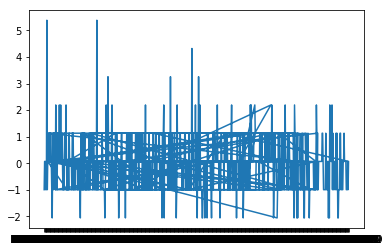

In [684]:
plt.plot(another_df['Z_Scaled'])

## MIN MAX NORMALIZATION

In [690]:
minmax_tranfrom = preprocessing.MinMaxScaler().fit(another_df.iloc[:,:-2])
minmax_tranform = pre

### Conclusion:

***In this assignment We have got the oppertunity to understand how to handle multiple datasets and the complexity to write it into a new schema from different sources. This assignment also aimed at Understanding between various parameters and predictors and how better predictors can be made through various methodologies***